# R1. Project Topic, Direction, and Questions

Objective 1: Build a machine learning model that takes album cover images as input and predicts the genre.

Objective 2: Build a separate machine learning model that takes song metadata (text or name) from .csv files as input and predicts the genre.

Objective 3: Perform a comparative analysis of the accuracy and performance of both models.

Question 1: Can album cover images provide meaningful information for genre classification?

Question 2: Can song metadata (text or name) provide meaningful information for genre classification?

Question 3: How do the accuracy and performance of the image-based model compare to the text-based model in genre prediction?

# R2. Data Analysis and Exploration

### Import Libraries

In [1]:
# pip install any libraries you need
!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import os
import statsmodels.api as sm

from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from concurrent.futures import ThreadPoolExecutor
from sklearn.preprocessing import LabelBinarizer
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler




### Read The file

We extracted the data from Kaggle, filtered only for English langiage in the Excel and then uploaded it in the Dropbox/Hugging Face.
The link to the Kaggle data aset is below - No need to download it, just running this notebook will automatically process everything.

### Use the code below if you are running the notebook in google colab.

In [ ]:
#!wget -0 final-Copy.csv 'https://ww.dropbox.com/scl/fi/zl35v0cnl3x8s3yo5ywgp/final-Copy.csv?rlkey=9s64ni6k8pxscaogutnllpk7d&dl=1'
#data = pd.read_csv("final-Copy.csv")

### Use the code below if you are running the notebook locally.

In [3]:
import requests
from io import StringIO

In [4]:
# Dropbox link to the CSV file
dropbox_link = 'https://www.dropbox.com/scl/fi/zl35v0cnl3x8s3yo5ywgp/final-Copy.csv?rlkey=9s64ni6k8pxscaogutnllpk7d&dl=1'

# Download the CSV file
response = requests.get(dropbox_link)
if response.status_code == 200:
    # Read the CSV content into a Pandas DataFrame
    data = pd.read_csv(StringIO(response.text))
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

## Preprocessing, Cleaning and Exploratory data analysis (EDA)

In [5]:
data.head(10)

,Unnamed: 0,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,29477,spotify:track:4ZtFanR9U6ndgddUvNcjcG,1,Olivia Rodrigo,1,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,https://i.scdn.co/image/ab6761610000e5ebee954a...,0,...,0.3350,0.000000,0.0849,0.6880,166.928,178147,Australia,Oceania,English,0
1,29478,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,3,Olivia Rodrigo,1,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,https://i.scdn.co/image/ab6761610000e5ebee954a...,0,...,0.5840,0.000006,0.3700,0.1780,180.917,215507,Australia,Oceania,English,0
2,29479,spotify:track:5CZ40GBx1sQ9agT82CLQCT,4,Olivia Rodrigo,1,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,https://i.scdn.co/image/ab6761610000e5ebee954a...,0,...,0.6910,0.000000,0.1200,0.0849,100.607,229227,Australia,Oceania,English,0
3,29480,spotify:track:5wANPM4fQCJwkGd4rN57mH,6,Olivia Rodrigo,1,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,https://i.scdn.co/image/ab6761610000e5ebee954a...,0,...,0.7680,0.000014,0.1060,0.1370,143.875,242013,Australia,Oceania,English,0
4,29481,spotify:track:5JCoSi02qi3jJeHdZXMmR8,7,Olivia Rodrigo,1,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,https://i.scdn.co/image/ab6761610000e5ebee954a...,0,...,0.8660,0.000000,0.1470,0.2180,172.929,152667,Australia,Oceania,English,0
5,29482,spotify:track:02MWAaffLxlfxAUY7c5dvx,8,Glass Animals,1,Glass Animals,spotify:artist:4yvcSjfu4PC0CYQyLy4wSq,indietronica,https://i.scdn.co/image/ab6761610000e5eb66b27e...,0,...,0.4400,0.000007,0.0921,0.5310,80.870,238805,Australia,Oceania,English,0
6,29483,spotify:track:67BtfxlNbhBmCDR2L2l8qd,9,Lil Nas X,1,Lil Nas X,spotify:artist:7jVv8c5Fj3E9VhNjxT4snq,pop,https://i.scdn.co/image/ab6761610000e5ebab6bd6...,0,...,0.2970,0.000000,0.3840,0.7580,178.818,137876,Australia,Oceania,English,0
7,29484,spotify:track:0BGwAKW4u8kWOhWFflZxfl,10,Masked Wolf,1,Masked Wolf,spotify:artist:1uU7g3DNSbsu0QjSEqZtEd,australian hip hop,https://i.scdn.co/image/ab6761610000e5eb60243a...,0,...,0.1750,0.000000,0.1500,0.4720,149.996,132780,Australia,Oceania,English,0
8,29485,spotify:track:6SRsiMl7w1USE4mFqrOhHC,11,Olivia Rodrigo,1,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,https://i.scdn.co/image/ab6761610000e5ebee954a...,0,...,0.0311,0.000001,0.2800,0.2800,123.999,143747,Australia,Oceania,English,0
9,29486,spotify:track:2tGvwE8GcFKwNdAXMnlbfl,13,Olivia Rodrigo,1,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,https://i.scdn.co/image/ab6761610000e5ebee954a...,0,...,0.7650,0.000010,0.0839,0.3380,168.924,175933,Australia,Oceania,English,0


In [6]:
print(data['artist_genre'].value_counts())

pop               12051
dance pop          3646
rap                3151
0                  3046
uk pop             2416
                  ...  
halloween             1
french hip hop        1
ukrainian pop         1
bass house            1
dutch hip hop         1
Name: artist_genre, Length: 457, dtype: int64


### Dropping Duplicates and checking number of rows

In [7]:
data.shape

(66174, 36)

In [8]:
data_cleansed = data.copy().drop_duplicates(subset='track_name').reset_index(drop=True)

In [9]:
data.shape

(66174, 36)

In [10]:
data_cleansed.shape

(2144, 36)

In [11]:
print(data_cleansed['artist_genre'].value_counts())

pop                 341
rap                 126
dance pop            93
hip hop              70
uk pop               57
                   ... 
trance                1
k-pop girl group      1
post-grunge           1
outlaw country        1
afroswing             1
Name: artist_genre, Length: 259, dtype: int64


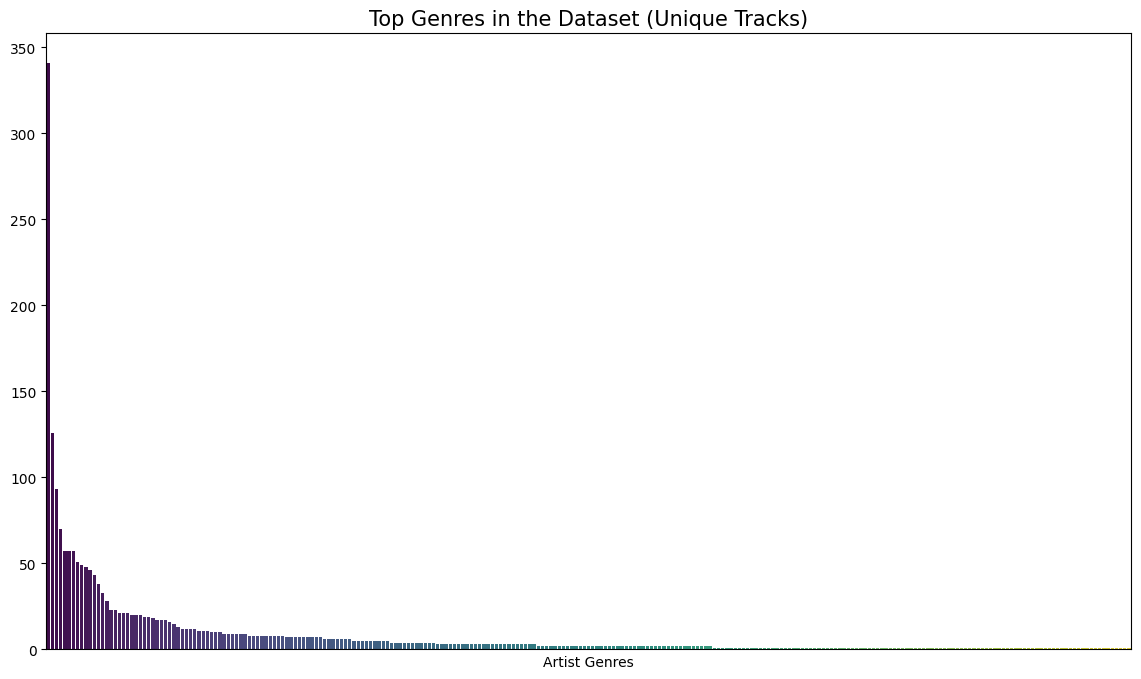

In [12]:
genre_counts = data_cleansed['artist_genre'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Top Genres in the Dataset (Unique Tracks)', fontsize=15)
plt.xticks([])  # Remove x-axis labels
plt.xlabel('Artist Genres')  # Set x-axis label
plt.show()

### Consolidate the genre

Create Dictionary

In [13]:
genres = {'rock': ['rock','album rock', 'alternative pop rock', 'alternative rock', 'art rock', 'australian alternative rock', 'australian indie rock', 'australian rock', 'blues rock', 'british alternative rock', 'british indie rock', 'bubblegrunge', 'celtic punk', 'celtic rock', 'christian alternative rock', 'classic canadian rock', 'classic rock', 'dance rock', 'garage rock', 'glam metal', 'glam rock', 'grunge', 'hard rock', 'heartland rock', 'indie garage rock', 'indie rock', 'indie rock italiano', 'irish rock', 'madchester', 'mellow gold', 'metalcore', 'modern alternative rock', 'modern blues rock', 'modern rock', 'old school thrash', 'piano rock', 'pop rock', 'post grunge', 'psychedelic rock', 'pub rock', 'rock', 'rock-and-roll', 'roots rock', 'soft rock', 'southern rock', 'surf punk', 'swamp rock', 'symphonic rock'],
          'pop': ['pop', 'acoustic pop', 'afropop', 'art pop', 'australian alternative pop', 'australian pop', 'barbadian pop', 'baroque pop', 'bedroom pop', 'belgian pop', 'boy band', 'britpop', 'bubblegum pop', 'canadian pop', 'candypop', 'chicago bop', 'chicago pop', 'classic girl group', 'classic uk pop', 'colombian pop', 'desi pop', 'dream pop', 'dutch pop', 'etherpop', 'europop', 'eurovision', 'french pop', 'gauze pop', 'ghanaian pop', 'girl group', 'greek pop', 'hip pop', 'hyperpop', 'indie pop', 'indie poptimism', 'irish pop', 'italian pop', 'metropopolis', 'modern dream pop', 'modern indie pop', 'neo-synthpop', 'new wave pop', 'norwegian pop', 'nyc pop', 'nz pop', 'pop punk', 'pop quebecois', 'pop urbaine', 'post-teen pop', 'scandipop', 'shimmer pop', 'shiver pop', 'social media pop', 'sophisti pop', 'south african pop', 'sudanese pop', 'swedish pop', 'synthpop', 'uk pop', 'ukranian pop', 'viral pop'],
          'trap': ['trap', 'atl trap', 'australian trap', 'canadian trap', 'dark trap', 'detroit trap', 'electronic trap', 'trap latino', 'trap queen', 'trap soul', 'vapor trap'],
          'rap': ['rap', 'afroswing', 'aussie drill', 'aesthetic rap', 'alabama rap', 'anime rap', 'baton rouge rap', 'beatboxing', 'bronx drill', 'brooklyn drill', 'cali rap', 'chicago drill', 'chicago rap', 'chill drill', 'crunk', 'dfw rap', 'dirty south rap', 'dmv rap', 'drill', 'drill brasileiro', 'emo rap', 'florida rap', 'gangster rap','grime', 'birmingham grime', 'houston rap', 'indie pop rap', 'instrumental grime', 'irish drill', 'k-rap', 'london rap', 'melodic rap', 'new orleans rap', 'new york drill', 'nyc rap', 'philly rap', 'pittsburgh rap', 'plugg', 'pluggnb', 'rap conscient', 'rap kreyol', 'rap latina', 'rap montrealais', 'rhode island rap', 'sad rap', 'scouse rap', 'st louis rap', 'toronto rap', 'uk drill', 'uk revival', 'uk melodic rap', 'upstate ny rap', 'viral rap', 'west coast rap'],
          'hip hop': ['hip hop', 'afrofuturism', 'alternative hip hop', 'atl hip hop', 'australian hip hop', 'boston hip hop', 'canadian hip hop', 'conscious hip hop', 'czsk hip hop', 'deep talent show', 'deep underground hip hop', 'desi hip hop', 'detroit hip hop', 'dream smp', 'dutch hip hop', 'east coast hip hop', 'french hip hop', 'glitchcore', 'gqom', 'hardcore hip hop', 'hawaiian hip hop', 'indie hip hop', 'indonesian hip hop', 'irish hip hop', 'kansas city hip hop', 'kentucky hip hop', 'lgbtq+ hip hop', 'manchester hip hop', 'memphis hip hop', 'miami hip hop', 'nigerian hip hop', 'north carolina hip hop', 'ohio hip hop', 'old school atlanta hip hop', 'psychedelic hip hop', 'puerto rican hip hop', 'queens hip hop', 'seattle hip hop', 'slovak hip hop', 'south carolina hip hop', 'southern hip hop', 'tennessee hip hop', 'uk hip hop', 'underground hip hop', 'virginia hip hop'],
          'r&b': ['r&b', 'afro r&b', 'alternative r&b', 'australian r&b', 'canadian contemporary r&b', 'chill r&b', 'contemporary r&b', 'indie r&b', 'pop r&b', 'r&b en espanol', 'uk contemporary r&b', 'urban contemporary'],
          'country': ['country', 'australian country', 'black americana', 'contemporary country', 'country dawn', 'country pop', 'country road', 'country rock', 'cowboy western', 'modern country rock', 'oklahoma country', 'outlaw country', 'texas country', 'traditional country'],
          'edm': ['edm', 'alternative dance', 'aussietronica', 'australian dance', 'australian electropop', 'australian house', 'australian psych', 'australian talent show', 'azonto', 'bass house', 'basshall', 'bass line', 'belgian edm', 'big room', 'bolobedu house', 'brostep', 'chill wave', 'dancefloor dnb', 'dark clubbing', 'deep groove house', 'deep house', 'deep minimal techno', 'deep pop edm', 'deep tropical house', 'destroy techno', 'disco', 'disco house', 'downtempo', 'dreamo', 'drum and bass', 'dutch edm', 'electro', 'electro house', 'electronica', 'electropop', 'eurodance', 'filter house', 'german dance', 'german techno', 'german trance', 'hip house', 'house', 'indietronica', 'irish electronic', 'melbourne bounce', 'melbourne bounce international', 'neo-psychedelic', 'new rave', 'new wave', 'ninja', 'permanent wave', 'pop dance', 'pop edm', 'pop electronico', 'pop house', 'progressive electrohouse', 'progressive house', 'russian edm', 'scottish techno', 'slap house', 'solo wave', 'south african house', 'talent show', 'trance', 'tropical alternativo', 'tropical house', 'uk dance', 'uk dnb', 'uk house', 'vocal house'],
          }



Convert the artist_genre according to the above dictionary and remove all rows not apart of the dictionary

In [14]:
def map_genre(genre):
    for key, values in genres.items():
        if genre in values:
            return key
    return "REMOVE_ROW"

# Apply the function to the 'artist_genre' column
data_cleansed['artist_genre'] = data_cleansed['artist_genre'].apply(map_genre)

# Filter out rows marked for removal
data_cleansed = data_cleansed[data_cleansed['artist_genre'] != "REMOVE_ROW"]


Working out the unique genres.

In [15]:
unique_genres = data_cleansed['artist_genre'].unique()

for genre in unique_genres:
    print(genre)

pop
edm
hip hop
rap
rock
r&b
country
trap


In [16]:
print(data_cleansed['artist_genre'].value_counts())

pop        589
rap        367
hip hop    282
edm        143
rock       142
country     75
trap        67
r&b         46
Name: artist_genre, dtype: int64


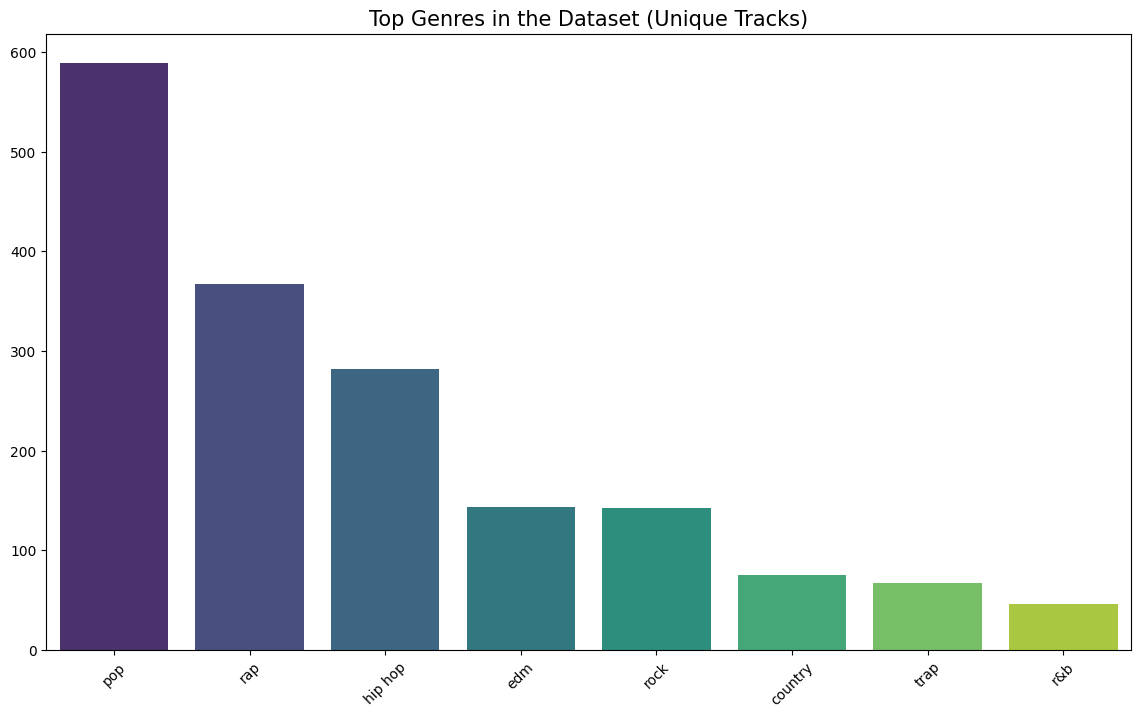

In [17]:
genre_counts = data_cleansed['artist_genre'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Top Genres in the Dataset (Unique Tracks)', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [18]:
# Identify the rows in the 'pop' genre
pop_genre_rows = data_cleansed[data_cleansed['artist_genre'] == 'pop']

# Randomly select a subset of 'pop' genre rows
num_rows_to_select = 367
if len(pop_genre_rows) > num_rows_to_select:
    randomly_selected_pop_rows = pop_genre_rows.sample(n=num_rows_to_select, random_state=42)
else:
    randomly_selected_pop_rows = pop_genre_rows

# Create a DataFrame with the rest of the rows (excluding 'pop' genre)
non_pop_genre_rows = data_cleansed[data_cleansed['artist_genre'] != 'pop']

# Concatenate the randomly selected 'pop' rows with the non-'pop' rows
data_cleansed = pd.concat([randomly_selected_pop_rows, non_pop_genre_rows])


In [19]:
print(data_cleansed['artist_genre'].value_counts())

pop        367
rap        367
hip hop    282
edm        143
rock       142
country     75
trap        67
r&b         46
Name: artist_genre, dtype: int64


Plot Mapped-Genres

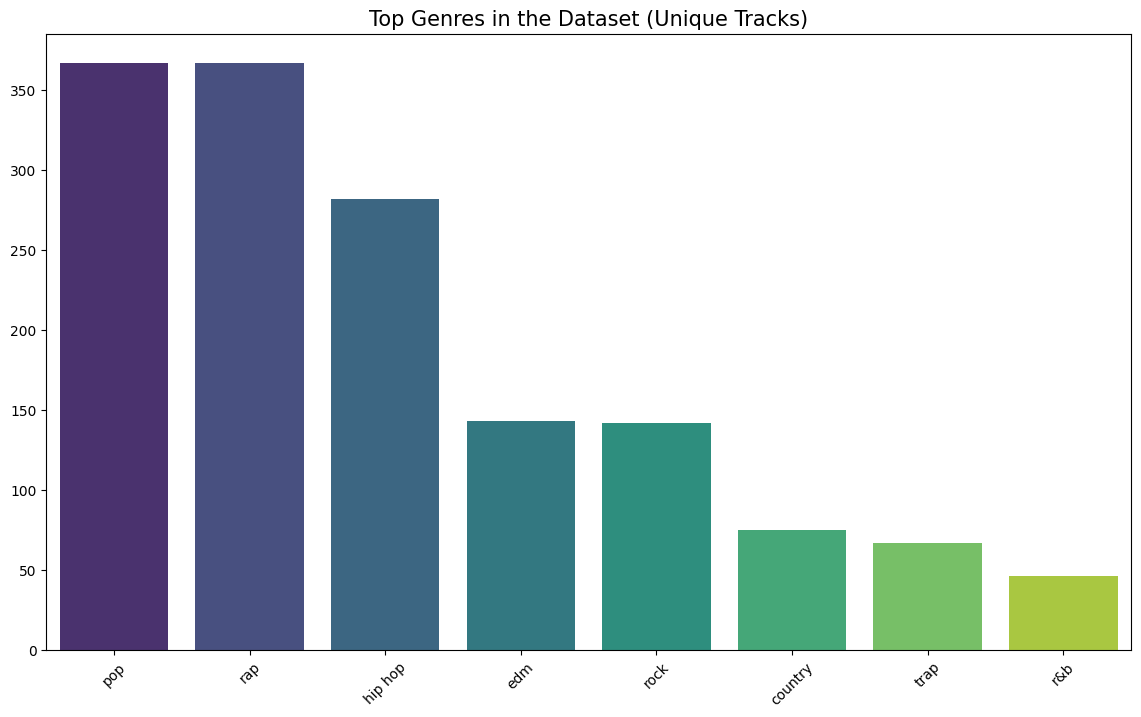

In [20]:
genre_counts = data_cleansed['artist_genre'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Top Genres in the Dataset (Unique Tracks)', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Split Train Test for Image and CSV

In [21]:
# The target column is the genre of music
target_column = 'artist_genre'

# Separate features (X) and target variable (y)
#X = data_cleansed.drop(columns=[target_column])
X = data_cleansed
y = data_cleansed[target_column]

# Split the data into training and testing sets
X_train_for_scaling, X_test_for_scaling, y_train_for_scaling, y_test_for_scaling = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set - Features:", X_train_for_scaling.shape, " Target:", y_train_for_scaling.shape)
print("Testing set - Features:", X_test_for_scaling.shape, " Target:", y_test_for_scaling.shape)

Training set - Features: (1191, 36)  Target: (1191,)
Testing set - Features: (298, 36)  Target: (298,)


### Create Copies for Train and Test

In [22]:
X_train_nn = X_train_for_scaling.copy()
X_test_nn = X_test_for_scaling.copy()
Y_train_nn = y_train_for_scaling.copy()
Y_test_nn = y_test_for_scaling.copy()

### Image - Preprocessing

### Method to Store the Album Covers

In [23]:
import os
import requests
from concurrent.futures import ThreadPoolExecutor

def process_data(data, genres, base_dir):
    def process_row(row):
        artist_genre_cell = str(row['artist_genre']).lower()
        album_cover = row['album_cover']

        for genre, subgenres in genres.items():
            if artist_genre_cell in subgenres:
                genre_folder = os.path.join(base_dir, genre)
                os.makedirs(genre_folder, exist_ok=True)
                filename = 'image-{}.jpg'.format(hash(album_cover))
                full_path = os.path.join(genre_folder, filename)

                if not os.path.exists(full_path):
                    try:
                        with requests.get(album_cover, stream=True) as response:
                            if response.status_code == 200:
                                with open(full_path, 'wb') as file:
                                    for chunk in response.iter_content(chunk_size=8192):
                                        file.write(chunk)
                            else:
                                print(f'Failed to download {album_cover}')
                    except Exception as e:
                        print(f'Error downloading {album_cover}: {str(e)}')

    with ThreadPoolExecutor(max_workers=16) as executor:
        futures = [executor.submit(process_row, row) for _, row in data.iterrows()]

    for future in futures:
        future.result()

### Calling the above method for both the testing and training set.

In [24]:
# Process training data
process_data(X_train_nn, genres, base_dir='/content/albumcover/train/')

# Process test data
process_data(X_test_nn, genres, base_dir='/content/albumcover/test/')

### Images - Resizing and normalisation method.

In [25]:
def process_images_and_labels(downloads_dir, target_size=(224, 224)):
    # Initialize empty lists to store images and labels
    images = []
    labels = []

    # List subdirectories in the "Downloads" directory (assuming each subdirectory represents a genre)
    genre_folders = [f.path for f in os.scandir(downloads_dir) if f.is_dir()]

    # Define a mapping from genre folder names to label values (you can customize this)
    genre_to_label = {folder_name: label for label, folder_name in enumerate(genre_folders)}

    # Iterate through each genre folder
    for genre_folder in genre_folders:
        # List image files in the genre folder
        image_files = [f.path for f in os.scandir(genre_folder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))]

        # Assign a label to the images based on the genre folder
        label = genre_to_label[genre_folder]

        # Iterate through image files in the genre folder
        for image_path in image_files:
            image = load_img(image_path, target_size=target_size)  # Resize the image
            image_array = img_to_array(image)
            image_array /= 255.0  # Normalize pixel values

            images.append(image_array)
            labels.append(label)

    # Convert lists to NumPy arrays for further processing
    images_array = np.array(images)
    labels_array = np.array(labels)

    return images_array, labels_array

### Calling the method on both the test and training images in order to resize them.

In [26]:
# Example usage for training data
images_train, labels_train = process_images_and_labels('/content/albumcover/train/')

# Example usage for test data
images_test, labels_test = process_images_and_labels('/content/albumcover/test/')

# Images - Encoding then splitting for training, validation and testing sets

In [27]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

# Encode the labels using one-hot encoding - Training Data
y_encoded_train_CNN = label_binarizer.fit_transform(labels_train)
y_encoded_train_ANN = label_binarizer.fit_transform(Y_train_nn)

# Encode the labels using one-hot encoding - Test Data
y_encoded_test_CNN = label_binarizer.fit_transform(labels_test)
y_encoded_test_ANN = label_binarizer.fit_transform(Y_test_nn)


### Drop the target Column

### Missing value

In [28]:
print(X_train_for_scaling.isnull().sum())

Unnamed: 0           0
uri                  0
rank                 0
artist_names         0
artists_num          0
artist_individual    0
artist_id            0
artist_genre         0
artist_img           0
collab               0
track_name           0
release_date         0
album_num_tracks     0
album_cover          0
source               0
peak_rank            0
previous_rank        0
weeks_on_chart       0
streams              0
week                 0
danceability         0
energy               0
key                  0
mode                 0
loudness             0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration             0
country              0
region               0
language             0
pivot                0
dtype: int64


In [29]:
print(X_test_for_scaling.isnull().sum())

Unnamed: 0           0
uri                  0
rank                 0
artist_names         0
artists_num          0
artist_individual    0
artist_id            0
artist_genre         0
artist_img           0
collab               0
track_name           0
release_date         0
album_num_tracks     0
album_cover          0
source               0
peak_rank            0
previous_rank        0
weeks_on_chart       0
streams              0
week                 0
danceability         0
energy               0
key                  0
mode                 0
loudness             0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration             0
country              0
region               0
language             0
pivot                0
dtype: int64


### Go through the fields of the dataset

In [30]:
X_train_for_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 461 to 1510
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1191 non-null   int64  
 1   uri                1191 non-null   object 
 2   rank               1191 non-null   int64  
 3   artist_names       1191 non-null   object 
 4   artists_num        1191 non-null   int64  
 5   artist_individual  1191 non-null   object 
 6   artist_id          1191 non-null   object 
 7   artist_genre       1191 non-null   object 
 8   artist_img         1191 non-null   object 
 9   collab             1191 non-null   int64  
 10  track_name         1191 non-null   object 
 11  release_date       1191 non-null   object 
 12  album_num_tracks   1191 non-null   int64  
 13  album_cover        1191 non-null   object 
 14  source             1191 non-null   object 
 15  peak_rank          1191 non-null   int64  
 16  previous_rank      119

### Drop Fields and Keep only Relevant fields

We are keeping all the numeric fields and deleting all columns which are "objects" except the target "artist_genre" column.

In [31]:
# Identify columns with data type 'object' and exclude 'artist_genre'
object_columns = X_train_for_scaling.select_dtypes(include='object').columns
columns_to_keep = ['artist_genre'] + list(set(X_train_for_scaling.columns) - set(object_columns))

# Keep only specified columns
X_train_for_scaling = X_train_for_scaling[columns_to_keep]
X_test_for_scaling = X_test_for_scaling[columns_to_keep]

### Dropping the target column from the Train and Test sets.

In [32]:
X_train_for_scaling = X_train_for_scaling.drop(columns=[target_column])
X_test_for_scaling = X_test_for_scaling.drop(columns=[target_column])

In [33]:
print(f"The shape of the X_train_for_scaling now is: {X_train_for_scaling.shape}")

The shape of the X_train_for_scaling now is: (1191, 22)


In [34]:
print(f"The shape of the X_test_for_scaling now is: {X_test_for_scaling.shape}")

The shape of the X_test_for_scaling now is: (298, 22)


### Plot graphs to detect outliers

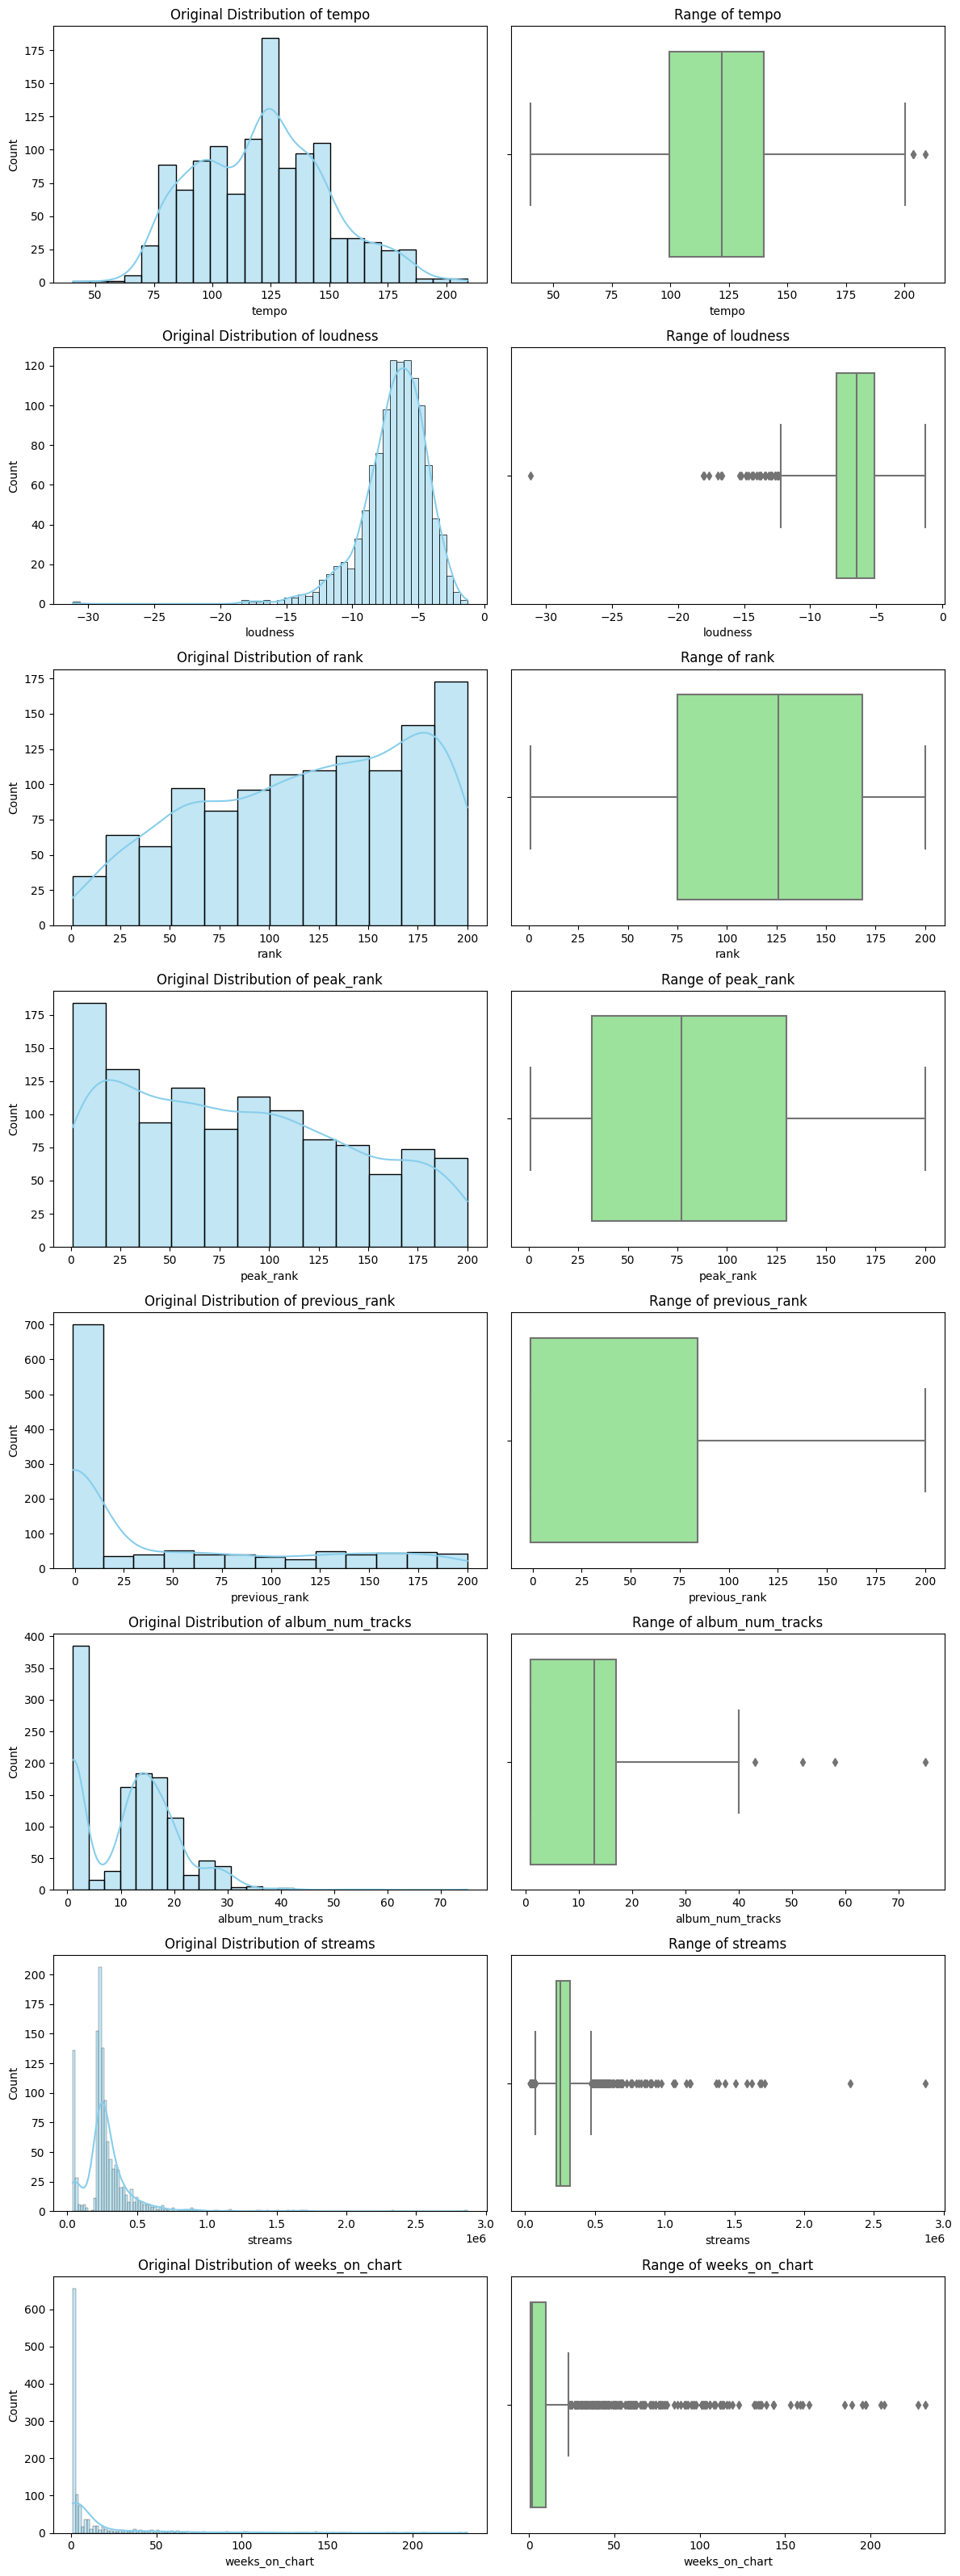

In [35]:
columns_to_plot = ['tempo', 'loudness', 'rank', 'peak_rank', 'previous_rank', 'album_num_tracks', 'streams', 'weeks_on_chart']

fig, axs = plt.subplots(len(columns_to_plot), 2, figsize=(12, 4 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    sns.histplot(X_train_for_scaling[column], kde=True, ax=axs[i, 0], color="skyblue")
    axs[i, 0].set_title(f'Original Distribution of {column}')

    sns.boxplot(x=X_train_for_scaling[column], ax=axs[i, 1], color="lightgreen")
    axs[i, 1].set_title(f'Range of {column}')

plt.tight_layout()
plt.show()

### Plotting the training data before scaling.

### Randomly select 5 columns to explore just to see the effects of scaling.

In [36]:
# Randomly select 5 columns
selected_columns = np.random.choice(X_train_for_scaling.columns, size=5, replace=False)
selected_data = X_train_for_scaling[selected_columns]

### Violin Plots for the 5 randomly selected columns.

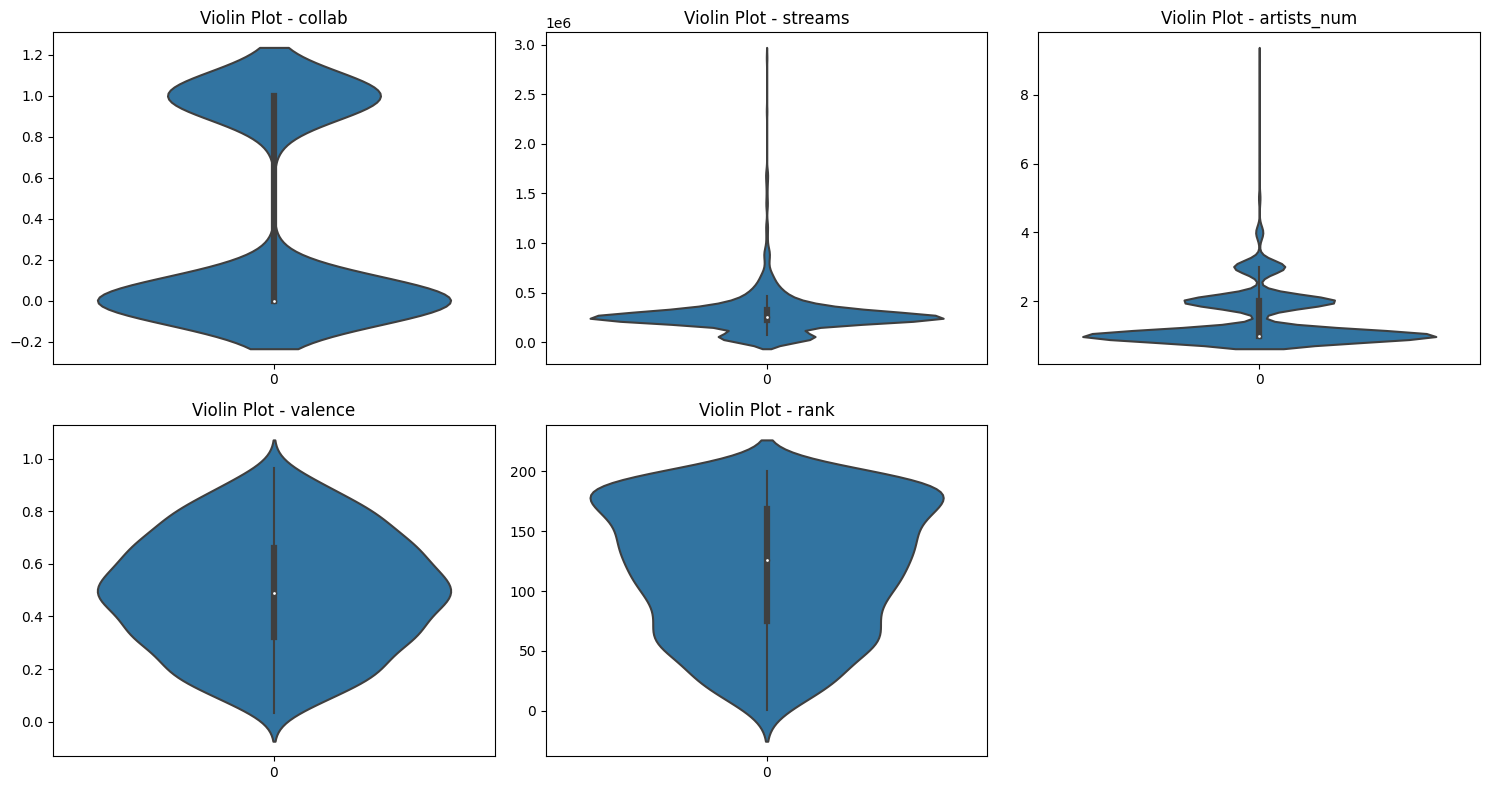

In [37]:
# Reset the index of selected_data
selected_data.reset_index(drop=True, inplace=True)

# Create separate violin plots for each selected column
plt.figure(figsize=(15, 8))


for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot layout based on the number of selected columns
    sns.violinplot(selected_data[column])  # Use selected_data instead of X_train
    plt.title(f'Violin Plot - {column}')

plt.tight_layout()
plt.show()

### Min-Max scaling the training data.

In [38]:
# Create MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_for_scaling), columns=X_train_for_scaling.columns)


### Plotting the training data after scaling.

### Violin Plots for the same 5 randomly selected columns but for the scaled data.

In [39]:
selected_data = X_train_scaled[selected_columns]

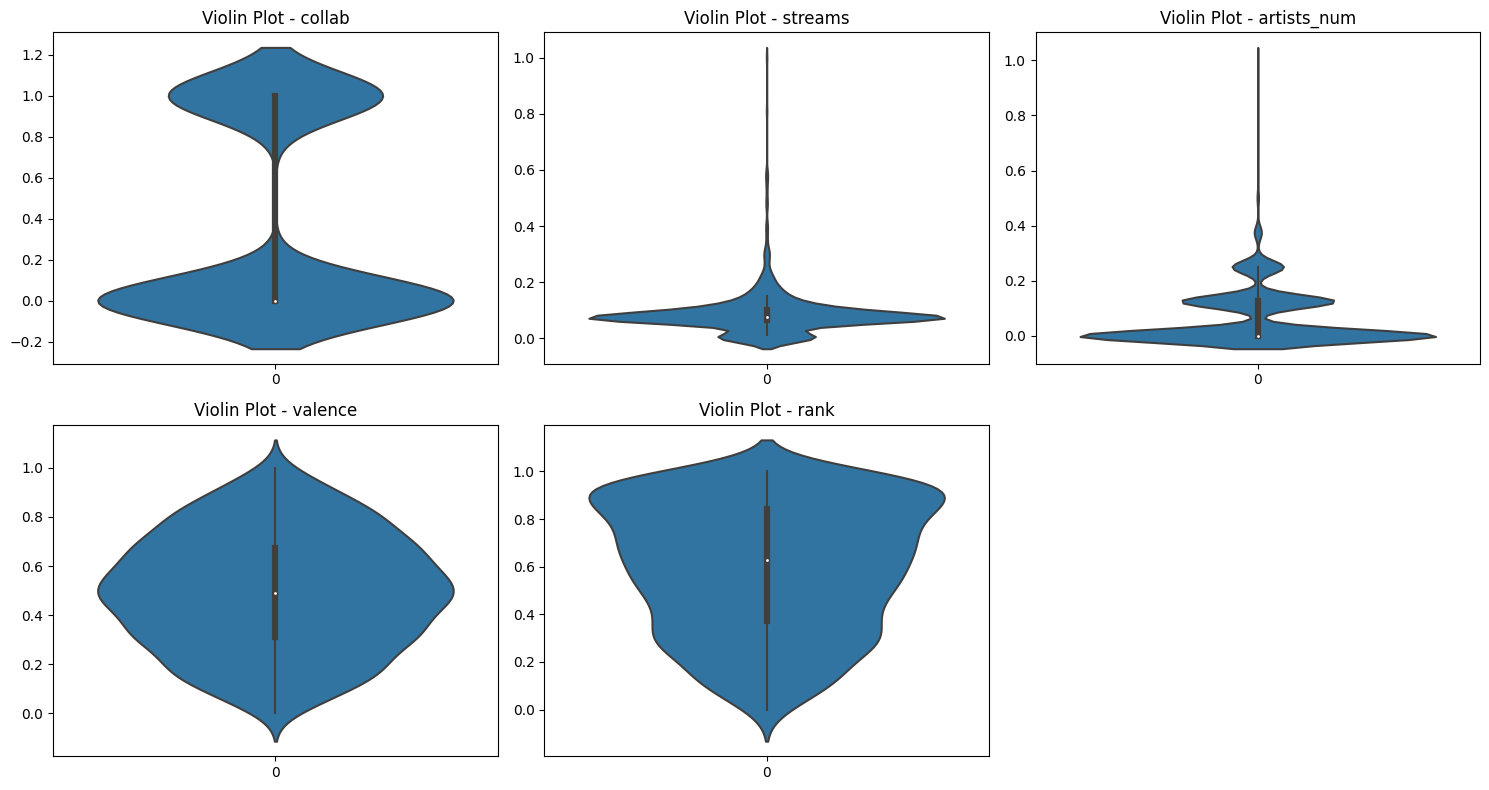

In [40]:
# Reset the index of selected_data
selected_data.reset_index(drop=True, inplace=True)

# Create separate violin plots for each selected column
plt.figure(figsize=(15, 8))


for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot layout based on the number of selected columns
    sns.violinplot(selected_data[column])  # Use selected_data instead of X_train
    plt.title(f'Violin Plot - {column}')

plt.tight_layout()
plt.show()

### Using the same scaler to transform the test data - https://medium.com/@spinjosovsky/normalize-data-before-or-after-split-of-training-and-testing-data-7b8005f81e26#:~:text=The%20recommended%20approach%20is%20to,results%20and%20unrealistic%20performance%20evaluations

### The scaled test data.

In [41]:
# Use the same scaler to transform the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test_for_scaling), columns=X_test_for_scaling.columns)

# R3. Clustering

## Input Features and Clusters

### Feature Engineering

In [ ]:
# 1st Round of Feature Engineering, all the numeric features - > Inertia: 980.7805162768636
object_columns = data_cleansed.select_dtypes(include='object').columns
columns_to_keep_clustering = list(set(data_cleansed.columns) - set(object_columns))

# 2nd Round of Feature Engineering, highest feature importance,results received from decision tree - > Inertia: 381.37093503125914
#columns_to_keep_clustering = ['rank',  'tempo',  'liveness',  'acousticness', 'valence', 'speechiness', 'weeks_on_chart', 'Unnamed: 0', 'loudness', 'album_num_tracks', 'energy', 'instrumentalness', 'duration', 'streams', 'danceability']

# 3red Round of Feature Engineering, where feature importance > 0.05, results received from decision tree - > Inertia: 170.30722500855677
#columns_to_keep_clustering = [  'tempo',    'acousticness',  'speechiness', 'Unnamed: 0',  'album_num_tracks', 'energy', 'duration', 'danceability']



### Scaling the features

In [ ]:
data_cleansed_clustering = data_cleansed.copy()[columns_to_keep_clustering]
data_scaled_clustering = scaler.fit_transform(data_cleansed_clustering)

## Clustering Algorithms K-Means

### WCSS - using scaled data above

In [ ]:
wcss_pca = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data_scaled_clustering)
    wcss_pca.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### Elbow Method

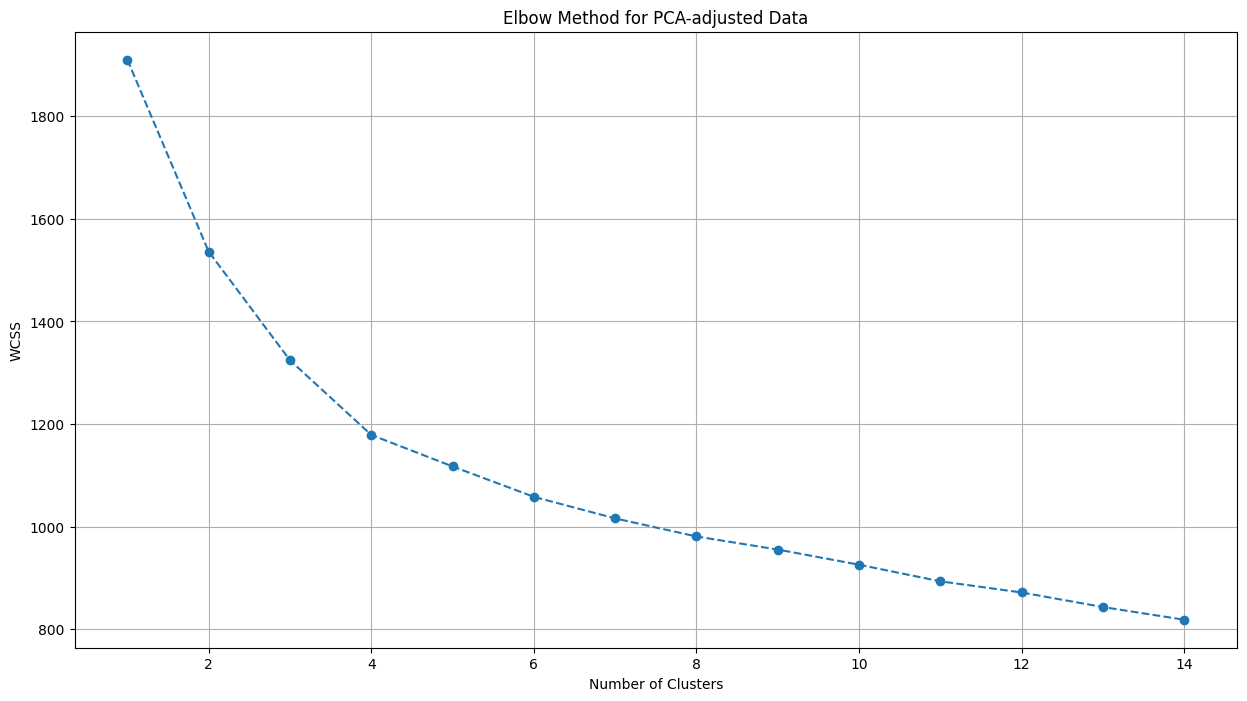

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 15), wcss_pca, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for PCA-adjusted Data')
plt.grid(True)
plt.show()

### Build the K-Means Model

In [ ]:
cluster_num = 8
kmeans_model = KMeans(n_clusters=cluster_num, init='k-means++', random_state=0)
kmeans_model.fit(data_scaled_clustering)

kmeans_labels = kmeans_model.predict(data_scaled_clustering)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualizations - K-Means

### Map the cluster labels to the original dataset

In [ ]:
data_with_clusters = data_cleansed.copy()
data_with_clusters['Cluster_Labels'] = kmeans_model.labels_

### Plot the Cluster Distribution

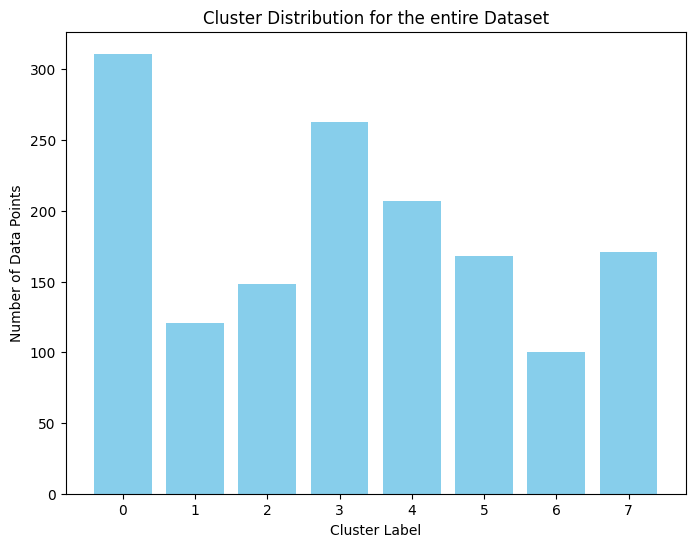

In [ ]:
  from collections import Counter

  # Count the number of data points in each cluster
  cluster_count = dict(Counter(kmeans_labels))

  # Plotting the cluster distribution
  plt.figure(figsize=(8, 6))
  plt.bar(cluster_count.keys(), cluster_count.values(), color='skyblue')
  plt.xlabel('Cluster Label')
  plt.ylabel('Number of Data Points')
  plt.title('Cluster Distribution for the entire Dataset')
  plt.show()

### Observe how the genres are placed inside each cluster

In [ ]:
pd.set_option('display.max_rows', None)

# Group by cluster labels and genres, counting occurrences
cluster_genre_counts = data_with_clusters.groupby(['Cluster_Labels', 'artist_genre']).size().reset_index(name='Count')

# Display the counts of genres in each cluster
print(cluster_genre_counts)

    Cluster_Labels artist_genre  Count
0                0      country     14
1                0          edm     41
2                0      hip hop     73
3                0          pop     57
4                0          r&b      6
5                0          rap     91
6                0         rock      5
7                0         trap     24
8                1      country     20
9                1          edm      9
10               1      hip hop      9
11               1          pop     32
12               1          r&b      2
13               1          rap     26
14               1         rock     22
15               1         trap      1
16               2      country      3
17               2          edm      9
18               2      hip hop     31
19               2          pop     33
20               2          r&b      8
21               2          rap     37
22               2         rock     23
23               2         trap      4
24               3      c

### Plot to display the counts of genres within each cluster

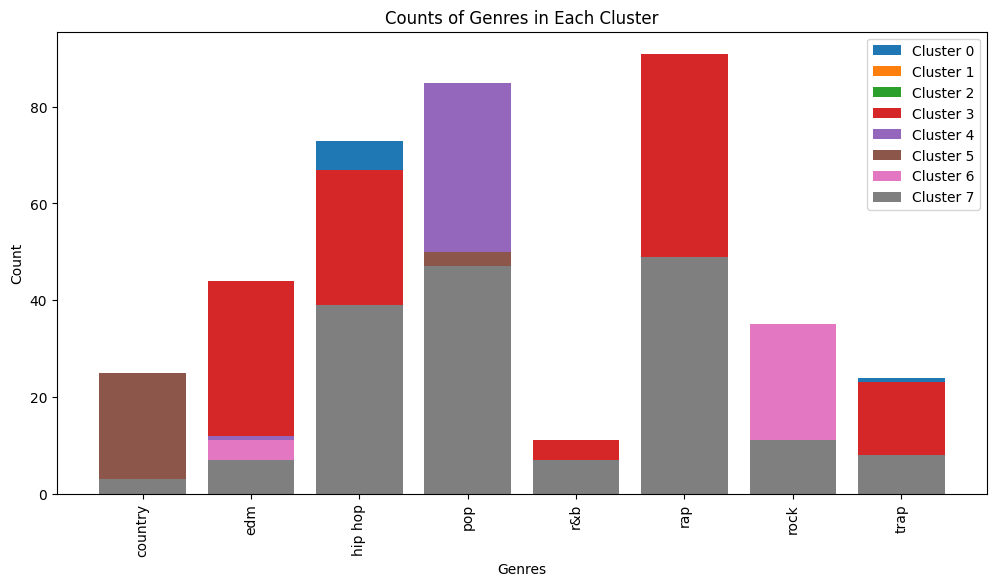

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(cluster_genre_counts['Cluster_Labels'].nunique()):
    cluster_data = cluster_genre_counts[cluster_genre_counts['Cluster_Labels'] == i]
    plt.bar(cluster_data['artist_genre'], cluster_data['Count'], label=f'Cluster {i}')

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Counts of Genres in Each Cluster')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Hyperparameter Variations - K-Means

## Performance Metrics - K-Means

### Calculation of Inertia

In [ ]:
inertia = kmeans_model.inertia_
print(f"Inertia: {inertia}")

Inertia: 980.7805162768636


### Calculation and Plotting of Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_scaled_clustering, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.1704122906459158


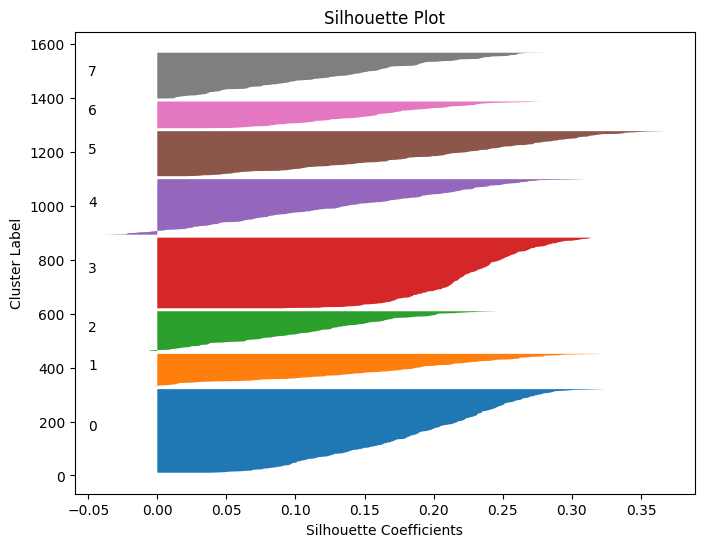

In [ ]:
from sklearn.metrics import silhouette_samples

# Calculatig the silhouette scores for every sample
silhouette_score = silhouette_samples(data_scaled_clustering, kmeans_labels)

# The below code will Plot silhouette scores for each sample
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(cluster_num):
    ith_cluster_silhouette_score = silhouette_score[kmeans_labels == i]
    ith_cluster_silhouette_score.sort()
    y_upper = y_lower + ith_cluster_silhouette_score.shape[0]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_score)
    plt.text(-0.05, y_lower + 0.5 * ith_cluster_silhouette_score.shape[0], str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette Coefficients")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot")
plt.show()

### Verify the statisicts of the clusters

In [ ]:
# Retrive the cluster centroids
# This is yet to be used - need to find a way how to use the centroids
centroids = kmeans_model.cluster_centers_



# Display statistics for each of the clusters
cluster_stats = data_with_clusters.groupby('Cluster_Labels').describe()
print(cluster_stats.to_string())


               Unnamed: 0                                                                                     rank                                                            artists_num                                              collab                                    album_num_tracks                                                    peak_rank                                                            previous_rank                                                           weeks_on_chart                                                     streams                                                                                    danceability                                                            energy                                                                 key                                                  mode                                    loudness                                                              speechiness                                           

## Clustering Algorithms & Visualization - Hierarchical Clustering

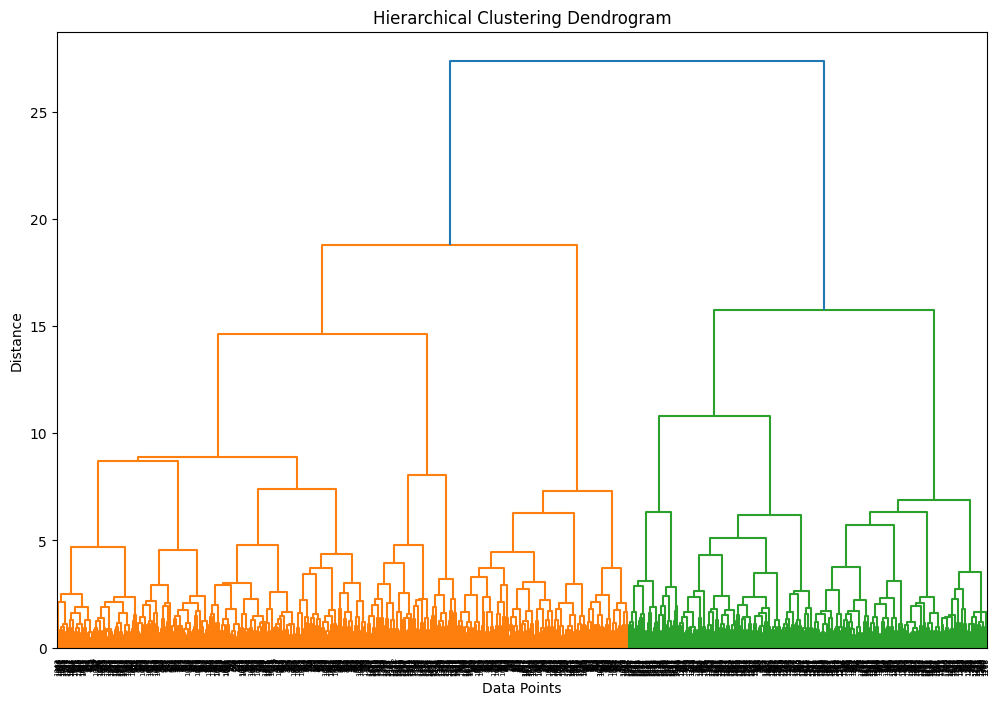

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculating the linkage matrix below
linkage_matrix = linkage(data_scaled_clustering, 'ward')

# This is to plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# We are using the distance thresh hold to determine the cluster
distance = 15

# Get the  cluster labels based on the distance threshold mentioned above
hierarchical_labels = fcluster(linkage_matrix, distance, criterion='distance')

# Print the cluster lables
print(hierarchical_labels)


[4 3 4 ... 2 2 2]


### Performance Metrics - Hierarchical Clustering

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_scaled_clustering, hierarchical_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.20085768044665434


# R4. Decision Trees

## Input features and Target Labels

### Input Features

In [45]:
for column in X_test_scaled.columns:
    print(column)

liveness
speechiness
streams
peak_rank
Unnamed: 0
weeks_on_chart
rank
valence
loudness
tempo
previous_rank
key
instrumentalness
acousticness
artists_num
danceability
energy
album_num_tracks
collab
duration
pivot
mode


### Target Labels

In [54]:
y_train_for_scaling_reset = y_train_for_scaling.reset_index(drop=True)
print(len(y_train_for_scaling_reset))

for index, value in y_train_for_scaling_reset.items():
    print(f"Index: {index}, Value: {value}")

1191
Index: 0, Value: r&b
Index: 1, Value: hip hop
Index: 2, Value: rap
Index: 3, Value: country
Index: 4, Value: hip hop
Index: 5, Value: hip hop
Index: 6, Value: trap
Index: 7, Value: rap
Index: 8, Value: edm
Index: 9, Value: rock
Index: 10, Value: rap
Index: 11, Value: rap
Index: 12, Value: rap
Index: 13, Value: rap
Index: 14, Value: edm
Index: 15, Value: rock
Index: 16, Value: pop
Index: 17, Value: trap
Index: 18, Value: rap
Index: 19, Value: rock
Index: 20, Value: rap
Index: 21, Value: pop
Index: 22, Value: rap
Index: 23, Value: pop
Index: 24, Value: rock
Index: 25, Value: pop
Index: 26, Value: pop
Index: 27, Value: edm
Index: 28, Value: hip hop
Index: 29, Value: trap
Index: 30, Value: rock
Index: 31, Value: hip hop
Index: 32, Value: edm
Index: 33, Value: pop
Index: 34, Value: pop
Index: 35, Value: rap
Index: 36, Value: rap
Index: 37, Value: pop
Index: 38, Value: hip hop
Index: 39, Value: pop
Index: 40, Value: country
Index: 41, Value: country
Index: 42, Value: rap
Index: 43, Valu

### The target labels are as follows. They represent the target classes which the model wants to predict.

In [55]:
unique_labels = y_train_for_scaling_reset.unique()

for label in unique_labels:
    print(label)

r&b
hip hop
rap
country
trap
edm
rock
pop


## Multi-Class Decision Tree

### Build the Decision Tree with initial hyperparameters to get an understanding of how well it performs.

In [56]:
DT_model = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=None, min_samples_split=2,random_state=42)

### Train the Decision Tree on the X_train_scaled data

In [57]:
DT_model.fit(X_train_scaled,y_train_for_scaling)

DecisionTreeClassifier(random_state=42)

### Obtain the accuracy.

In [58]:
y_pred = DT_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_for_scaling, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.32550335570469796


### Feature Importance Score

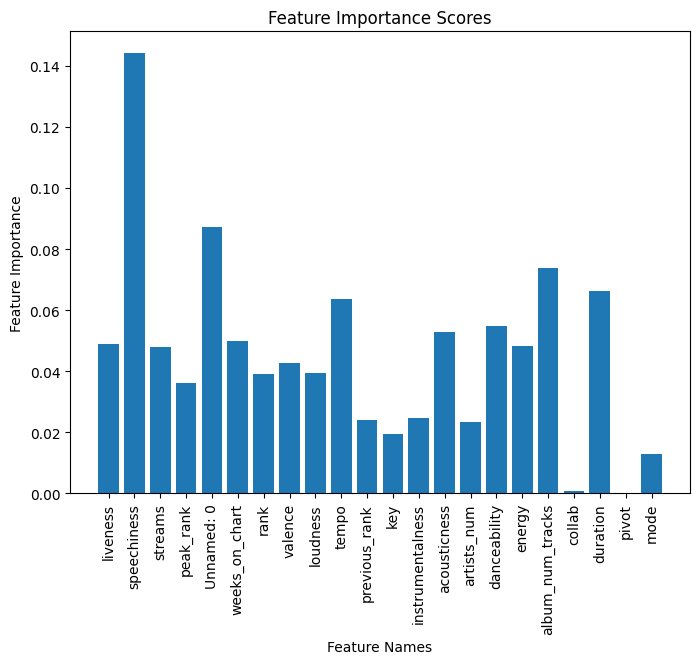

In [59]:
feature_importance = DT_model.feature_importances_

feature_names = X_train_scaled.columns.tolist()
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

In [60]:
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)


             Feature  Importance
1        speechiness    0.144099
4         Unnamed: 0    0.087200
17  album_num_tracks    0.073876
19          duration    0.066157
9              tempo    0.063687
15      danceability    0.054679
13      acousticness    0.052895
5     weeks_on_chart    0.050005
0           liveness    0.048787
16            energy    0.048235
2            streams    0.047778
7            valence    0.042555
8           loudness    0.039437
6               rank    0.038967
3          peak_rank    0.036178
12  instrumentalness    0.024818
10     previous_rank    0.024031
14       artists_num    0.023446
11               key    0.019596
21              mode    0.012849
18            collab    0.000724
20             pivot    0.000000


### The results for the initial Decision Tree

              precision    recall  f1-score   support

     country       0.27      0.29      0.28        14
         edm       0.44      0.28      0.34        29
     hip hop       0.27      0.32      0.29        60
         pop       0.41      0.38      0.39        72
         r&b       0.00      0.00      0.00         8
         rap       0.38      0.37      0.38        78
        rock       0.30      0.35      0.32        23
        trap       0.09      0.14      0.11        14

    accuracy                           0.33       298
   macro avg       0.27      0.26      0.26       298
weighted avg       0.34      0.33      0.33       298



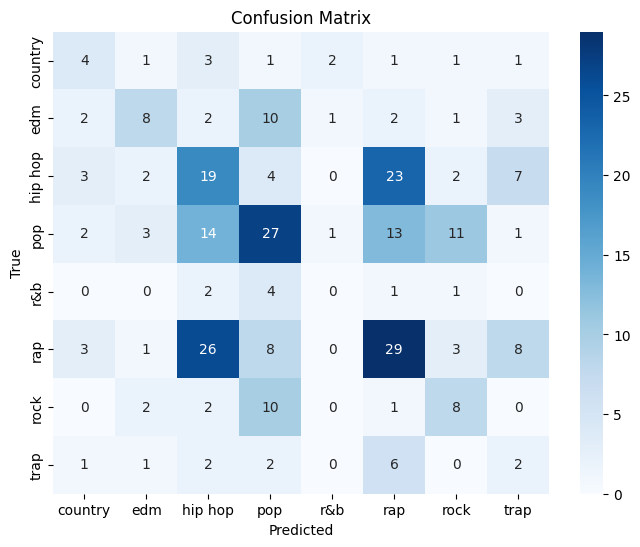

In [61]:
# Get the unique class labels in the order in which they are encoded
class_labels = DT_model.classes_

# Calculate the confusion matrix
cm = confusion_matrix(y_test_for_scaling, y_pred)

# Print classification report for additional information
print(classification_report(y_test_for_scaling, y_pred, target_names=class_labels))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Resampling the data to address class imbalancing.

Random oversampling increases the number of instances in the minority class of a dataset by randomly duplicating existing examples, balancing the class distribution for improved model training.

In [62]:
# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state = 42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train_for_scaling)

### HyperParameter Tuning - Using the resampled data.

In [63]:
# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

DT_model = DecisionTreeClassifier(random_state = 42)

# Create a grid search object with cross-validation using KFold with a fixed random state
grid_search = GridSearchCV(
    DT_model,
    param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Set the random state here
)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [64]:
best_hyperparameters = grid_search.best_params_

DT_model_hyp_tuned = DecisionTreeClassifier(**best_hyperparameters, random_state = 42)

DT_model_hyp_tuned.fit(X_train_scaled,y_train_for_scaling)

y_pred = DT_model_hyp_tuned.predict(X_test_scaled)
accuracy = accuracy_score(y_test_for_scaling, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.37919463087248323


### Feature importance for the Decision Tree which has been tuned for the hyperparameter stuff.

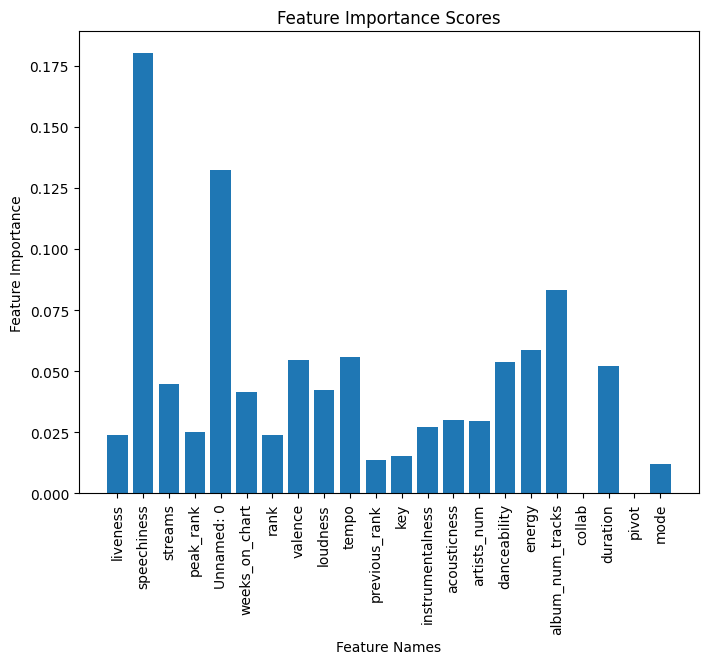

In [65]:
feature_importance = DT_model_hyp_tuned.feature_importances_

feature_names = X_train_scaled.columns.tolist()
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

### Results for the Tuned Decision Tree Model which uses the resampled data.

              precision    recall  f1-score   support

     country       0.25      0.29      0.27        14
         edm       0.65      0.45      0.53        29
     hip hop       0.33      0.30      0.32        60
         pop       0.41      0.40      0.41        72
         r&b       0.11      0.12      0.12         8
         rap       0.46      0.50      0.48        78
        rock       0.30      0.35      0.32        23
        trap       0.06      0.07      0.06        14

    accuracy                           0.38       298
   macro avg       0.32      0.31      0.31       298
weighted avg       0.39      0.38      0.38       298



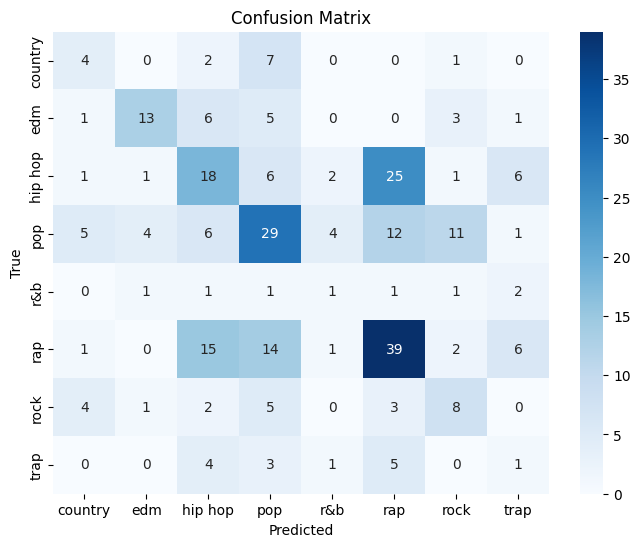

In [66]:
# Get the unique class labels in the order in which they are encoded
class_labels = DT_model_hyp_tuned.classes_

# Calculate the confusion matrix
cm = confusion_matrix(y_test_for_scaling, y_pred)

# Print classification report for additional information
print(classification_report(y_test_for_scaling, y_pred, target_names=class_labels))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

### Using the original data which has not been resampled.

Accuracy: 0.5
              precision    recall  f1-score   support

     country       0.88      0.50      0.64        14
         edm       0.72      0.45      0.55        29
     hip hop       0.43      0.33      0.37        60
         pop       0.49      0.72      0.58        72
         r&b       0.00      0.00      0.00         8
         rap       0.46      0.63      0.53        78
        rock       0.64      0.30      0.41        23
        trap       1.00      0.07      0.13        14

    accuracy                           0.50       298
   macro avg       0.58      0.38      0.40       298
weighted avg       0.53      0.50      0.48       298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


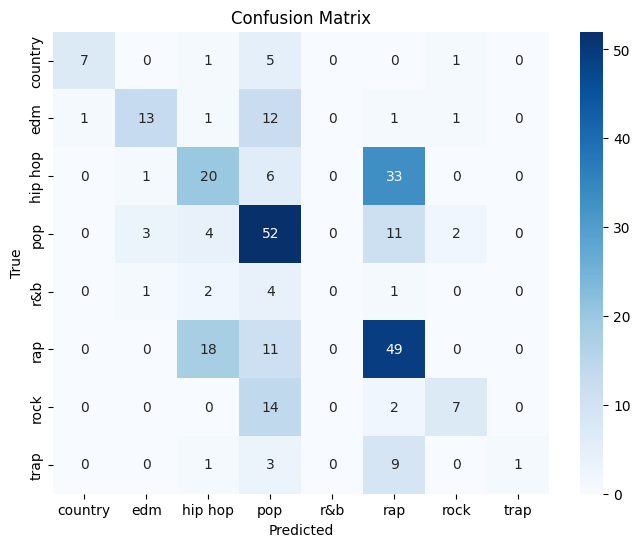

In [67]:
rf = RandomForestClassifier(random_state = 42, n_jobs=1)
rf.fit(X_train_scaled, y_train_for_scaling)

# Make predictions on the validation set
y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test_for_scaling, y_pred)
print(f'Accuracy: {accuracy}')


# Get the unique class labels in the order in which they are encoded
class_labels = rf.classes_

# Calculate the confusion matrix
cm = confusion_matrix(y_test_for_scaling, y_pred)

# Print classification report for additional information
print(classification_report(y_test_for_scaling, y_pred, target_names=class_labels))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Random Forest - Using resampled data.

Accuracy: 0.5100671140939598
              precision    recall  f1-score   support

     country       0.67      0.71      0.69        14
         edm       0.73      0.55      0.63        29
     hip hop       0.41      0.42      0.41        60
         pop       0.53      0.69      0.60        72
         r&b       0.00      0.00      0.00         8
         rap       0.48      0.51      0.49        78
        rock       0.56      0.43      0.49        23
        trap       0.33      0.07      0.12        14

    accuracy                           0.51       298
   macro avg       0.46      0.42      0.43       298
weighted avg       0.50      0.51      0.49       298



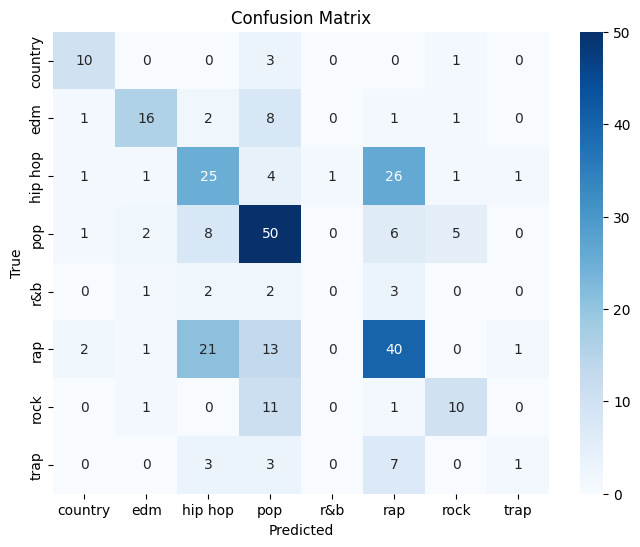

In [68]:
rf_resampled = RandomForestClassifier(random_state = 42, n_jobs=1)
rf_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred = rf_resampled.predict(X_test_scaled)

accuracy = accuracy_score(y_test_for_scaling, y_pred)
print(f'Accuracy: {accuracy}')

# Get the unique class labels in the order in which they are encoded
class_labels = rf_resampled.classes_

# Calculate the confusion matrix
cm = confusion_matrix(y_test_for_scaling, y_pred)

# Print classification report for additional information
print(classification_report(y_test_for_scaling, y_pred, target_names=class_labels))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance

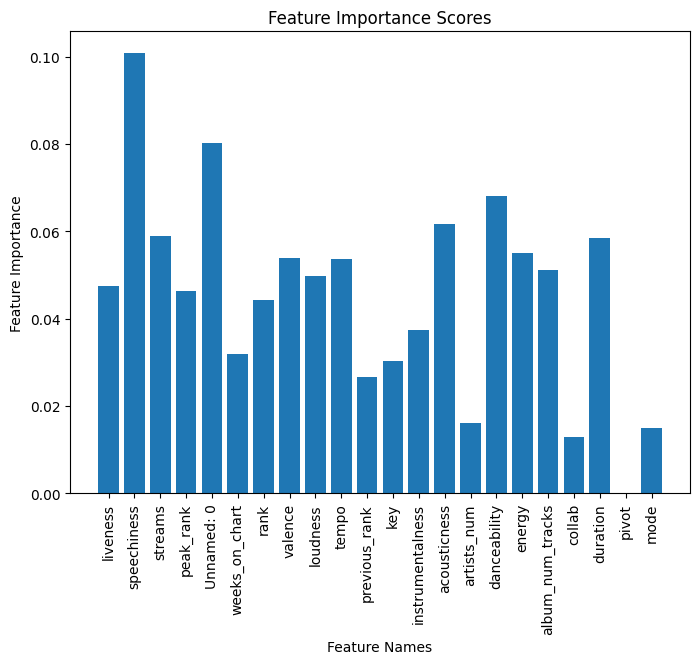

In [77]:
feature_importance = rf_resampled.feature_importances_

feature_names = X_train_scaled.columns.tolist()
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

### HyperParameter Tuning - using the resampled data.

In [73]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Declaring the Random Forrest
rf_model = RandomForestClassifier(random_state = 42)
# Create a grid search object with cross-validation using KFold with a fixed random state
grid_search = GridSearchCV(
    rf_model,  # Set the random state for the Random Forest
    param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Set the random state for KFold
)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


Accuracy: 0.4899328859060403
              precision    recall  f1-score   support

     country       0.60      0.64      0.62        14
         edm       0.63      0.59      0.61        29
     hip hop       0.39      0.35      0.37        60
         pop       0.54      0.61      0.57        72
         r&b       0.00      0.00      0.00         8
         rap       0.45      0.55      0.50        78
        rock       0.53      0.43      0.48        23
        trap       0.33      0.14      0.20        14

    accuracy                           0.49       298
   macro avg       0.43      0.41      0.42       298
weighted avg       0.47      0.49      0.48       298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


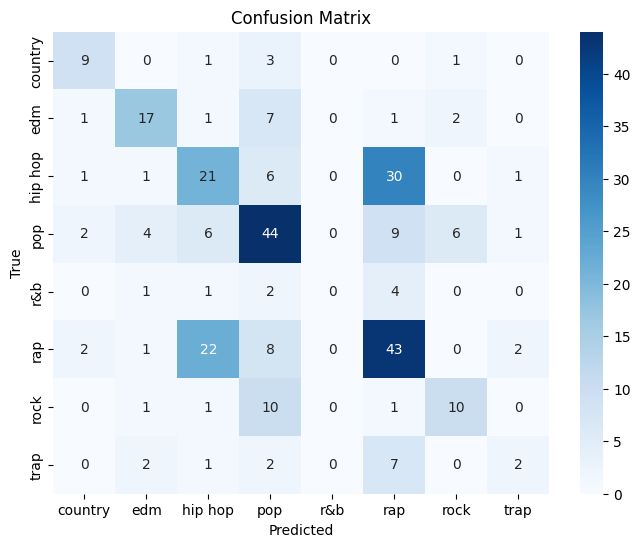

In [74]:
best_hyperparameters = grid_search.best_params_

rf_tuned = RandomForestClassifier(**best_hyperparameters, random_state = 42)

rf_tuned.fit(X_train_resampled,y_train_resampled)

y_pred = rf_tuned.predict(X_test_scaled)
accuracy = accuracy_score(y_test_for_scaling, y_pred)
print(f'Accuracy: {accuracy}')

# Get the unique class labels in the order in which they are encoded
class_labels = rf_tuned.classes_

# Calculate the confusion matrix
cm = confusion_matrix(y_test_for_scaling, y_pred)

# Print classification report for additional information
print(classification_report(y_test_for_scaling, y_pred, target_names=class_labels))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

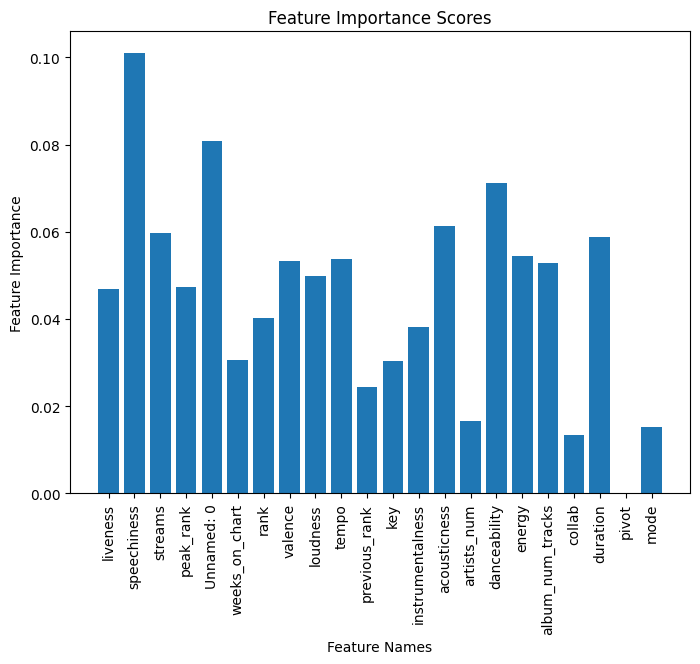

In [76]:
feature_importance = rf_tuned.feature_importances_

feature_names = X_train_scaled.columns.tolist()
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

### Image of the best performing Random Forrest.

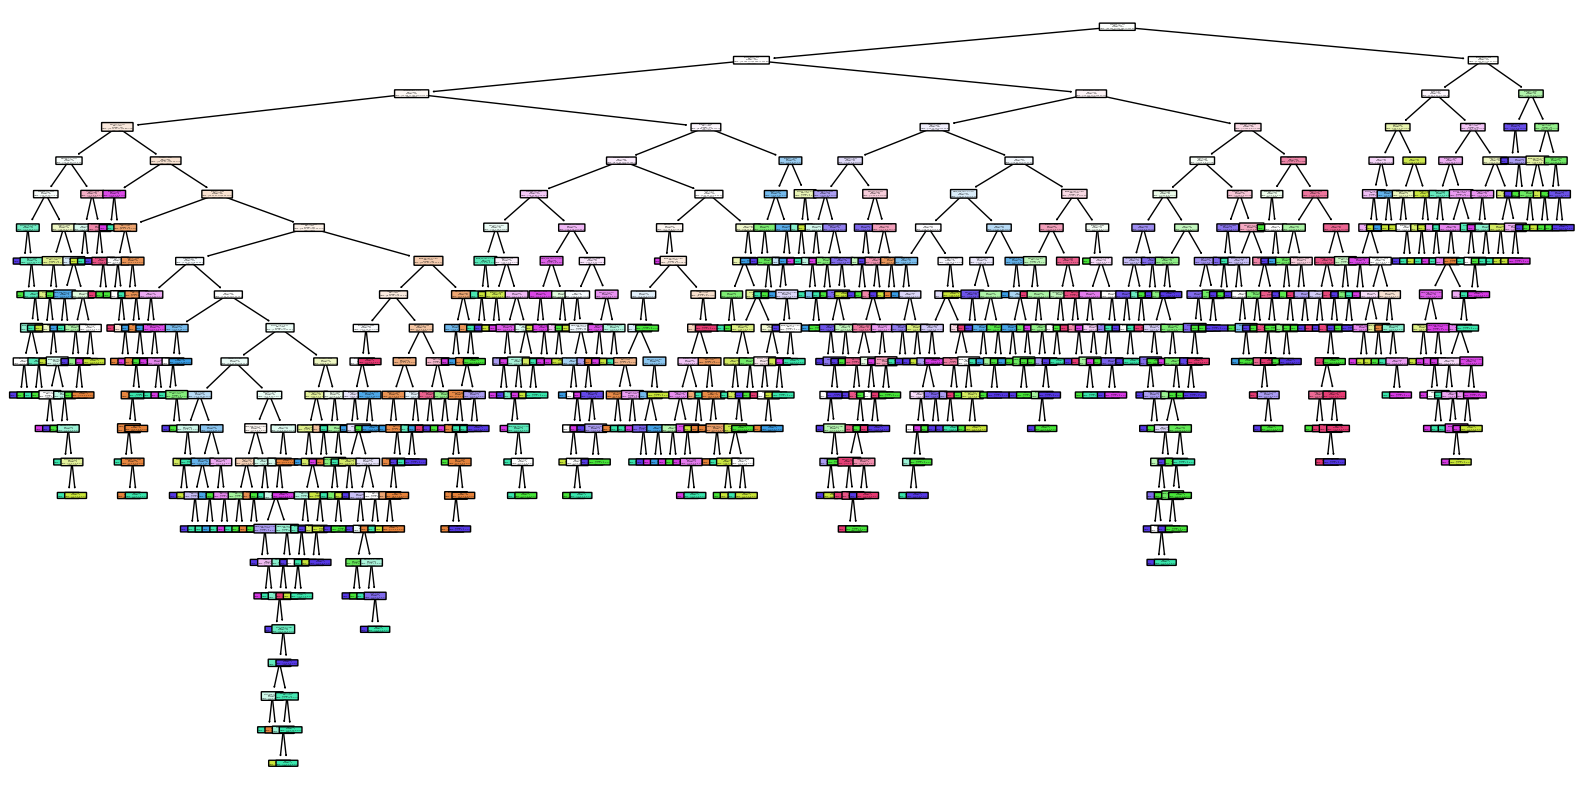

In [75]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


tree_to_visualize = rf_resampled.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, filled=True, feature_names=X_train_resampled.columns, class_names=class_labels, rounded=True)
plt.show()

# R5. CNN and ANN

## CNN - Image

### Build Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# num_classes = 8
num_classes = len(label_binarizer.classes_)

# Define the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Additional Convolutional Layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model.add(layers.Flatten())

# Fully Connected Layers
model.add(layers.Dense(1024, activation='relu'))  # Adjusted the number of units
model.add(layers.Dropout(0.5))  # Optional dropout for regularization
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

model.summary()

# Compile the model with a learning rate scheduler
initial_learning_rate = 0.0001  # Adjusted initial learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=3, restore_best_weights=True
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

### Train, test and analyse accuracy of model

In [ ]:
# Train the model with data augmentation and early stopping
history = model.fit(
    datagen.flow(images_train, y_encoded_train_CNN, batch_size=16),
    epochs=20,
    callbacks=[early_stopping],
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(images_test, y_encoded_test_CNN)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy}')

Epoch 1/20
54/54 [==============================] - 13s 215ms/step - loss: 1.9531 - accuracy: 0.2235
Epoch 2/20
54/54 [==============================] - 12s 214ms/step - loss: 1.9332 - accuracy: 0.2526
Epoch 3/20
54/54 [==============================] - 10s 178ms/step - loss: 1.9291 - accuracy: 0.2631
Epoch 4/20
54/54 [==============================] - 12s 212ms/step - loss: 1.9065 - accuracy: 0.2678
Epoch 5/20
54/54 [==============================] - 12s 215ms/step - loss: 1.8943 - accuracy: 0.2654
Epoch 6/20
54/54 [==============================] - 10s 188ms/step - loss: 1.8952 - accuracy: 0.2666
Epoch 7/20
54/54 [==============================] - 11s 202ms/step - loss: 1.8803 - accuracy: 0.2689
Epoch 8/20
54/54 [==============================] - 12s 214ms/step - loss: 1.8754 - accuracy: 0.2782
Epoch 9/20
54/54 [==============================] - 11s 212ms/step - loss: 1.8770 - accuracy: 0.2608
Epoch 10/20
54/54 [==============================] - 12s 219ms/step - loss: 1.8710 - accura

## Visualisation

8/8 [==============================] - 0s 22ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.14      0.20        29
           1       0.14      0.35      0.20        23
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         7
           4       0.42      0.40      0.41        62
           5       0.00      0.00      0.00        14
           6       0.30      0.06      0.11        47
           7       0.30      0.57      0.40        61

    accuracy                           0.30       254
   macro avg       0.19      0.19      0.16       254
weighted avg       0.28      0.30      0.26       254

Confusion Matrix:
 [[ 4  4  0  0  3  0  0 18]
 [ 1  8  0  0  2  0  0 12]
 [ 1  2  0  0  3  0  0  5]
 [ 1  0  0  0  1  0  0  5]
 [ 0 17  0  0 25  0  4 16]
 [ 1  3  0  0  5  0  1  4]
 [ 0 12  0  0 12  0  3 20]
 [ 3 12  0  0  9  0  2 35]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


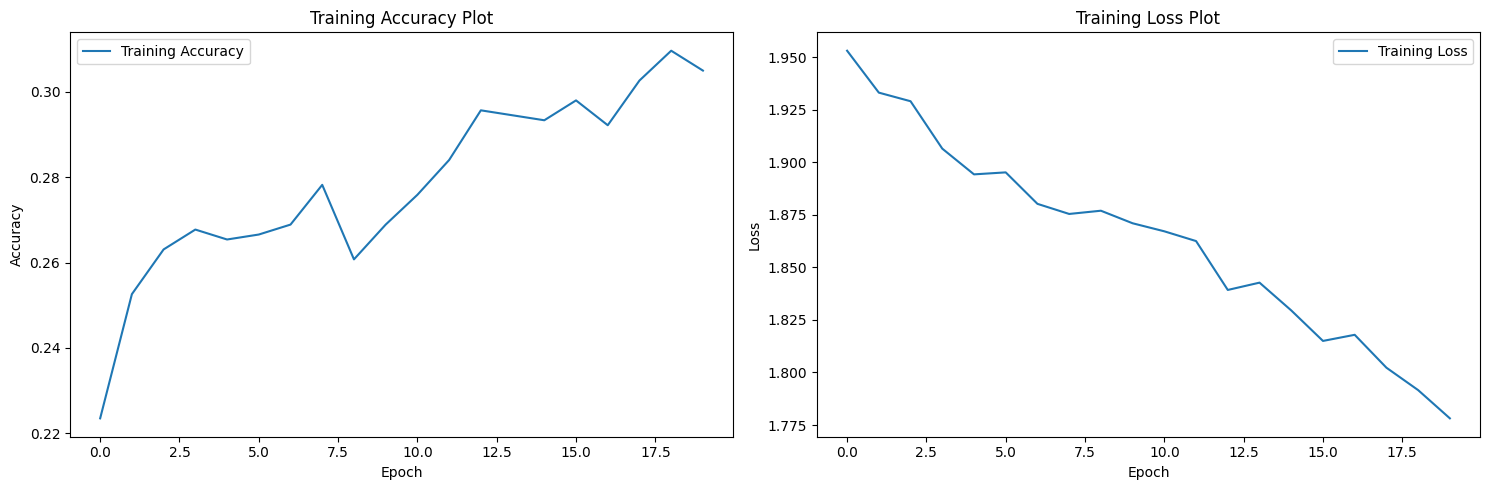

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred_probs = model.predict(images_test)  # Use probabilities, not classes
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_encoded_test_CNN, axis=1)

# Print classification report and confusion matrix
#print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, zero_division=1))

# Confusion Matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot training history without validation data
plt.figure(figsize=(15, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Plot')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Plot')
plt.legend()

plt.tight_layout()
plt.show()

### HyperParameter Tuning

In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt

# Define the hyperparameter search space
def model_builder(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Tune the number of filters in Conv2D layers
    for i in range(hp.Int('num_conv_layers', 1, 2)):
        model.add(layers.Conv2D(hp.Int(f'conv_{i}_filters', 32, 64, step=32), (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    # Tune the number of units in Dense layers
    for i in range(hp.Int('num_dense_layers', 1, 1)):
        model.add(layers.Dense(hp.Int(f'dense_{i}_units', 128, 256, step=64), activation='relu'))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.3, 0.4, step=0.1)))

    model.add(layers.Dense(num_classes, activation='softmax'))

    # You can choose to fix the learning rate instead of tuning it
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the tuner with random search
tuner = kt.RandomSearch(
    hypermodel=model_builder,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials as needed
    directory='my_dir',
    project_name='my_project',
    overwrite=True
)

# Search over the hyperparameter space using random search
tuner.search(
    datagen.flow(images_train, y_encoded_train_CNN, batch_size=16),
    epochs=5,
    validation_data=(images_test, y_encoded_test_CNN),
    callbacks=[early_stopping],
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
best_model.fit(
    datagen.flow(images_train, y_encoded_train_CNN, batch_size=16),
    epochs=10,
    validation_data=(images_test, y_encoded_test_CNN),
    callbacks=[early_stopping],
)

Trial 8 Complete [00h 00m 40s]
val_accuracy: 0.31102362275123596

Best val_accuracy So Far: 0.31102362275123596
Total elapsed time: 00h 05m 27s
Epoch 1/10
54/54 [==============================] - 13s 215ms/step - loss: 2.0820 - accuracy: 0.2002 - val_loss: 1.9316 - val_accuracy: 0.2480
Epoch 2/10
54/54 [==============================] - 11s 208ms/step - loss: 1.9674 - accuracy: 0.2375 - val_loss: 1.9311 - val_accuracy: 0.2717
Epoch 3/10
54/54 [==============================] - 9s 172ms/step - loss: 1.9594 - accuracy: 0.2468 - val_loss: 1.9035 - val_accuracy: 0.2677
Epoch 4/10
54/54 [==============================] - 10s 186ms/step - loss: 1.9500 - accuracy: 0.2491 - val_loss: 1.8827 - val_accuracy: 0.2717
Epoch 5/10
54/54 [==============================] - 11s 207ms/step - loss: 1.9330 - accuracy: 0.2375 - val_loss: 1.8841 - val_accuracy: 0.2717
Epoch 6/10
54/54 [==============================] - 11s 196ms/step - loss: 1.9271 - accuracy: 0.2689 - val_loss: 1.8969 - val_accuracy: 0.2953

### Best Parameters

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Number of Convolutional Layers: {best_hps.get('num_conv_layers')}")
for i in range(best_hps.get('num_conv_layers')):
    filters = best_hps.get(f'conv_{i}_filters')
    print(f"Convolutional Layer {i + 1} Filters: {filters}")

print(f"\nNumber of Dense Layers: {best_hps.get('num_dense_layers')}")
units = best_hps.get('dense_0_units')  # Since num_dense_layers is an integer, use 'dense_0_units'
dropout = best_hps.get('dropout_0')  # Similarly, use 'dropout_0'
print(f"Dense Layer 1 Units: {units}, Dropout: {dropout}")

print(f"\nLearning Rate: {best_hps.get('learning_rate')}")


## ANN - CSV

### Building the ANN, training in on the test data set using the appropriate label encoding.

### Then testing the algorihtm.

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.20))
model.add(Dense(units=8, activation='softmax'))  # Keep softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_encoded_train_ANN, epochs=60, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_encoded_test_ANN)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/60
38/38 [==============================] - 1s 3ms/step - loss: 1.9043 - accuracy: 0.2527
Epoch 2/60
38/38 [==============================] - 0s 4ms/step - loss: 1.8173 - accuracy: 0.3090
Epoch 3/60
38/38 [==============================] - 0s 3ms/step - loss: 1.7578 - accuracy: 0.3526
Epoch 4/60
38/38 [==============================] - 0s 4ms/step - loss: 1.7113 - accuracy: 0.3619
Epoch 5/60
38/38 [==============================] - 0s 4ms/step - loss: 1.6686 - accuracy: 0.3610
Epoch 6/60
38/38 [==============================] - 0s 4ms/step - loss: 1.6348 - accuracy: 0.3627
Epoch 7/60
38/38 [==============================] - 0s 4ms/step - loss: 1.5971 - accuracy: 0.3820
Epoch 8/60
38/38 [==============================] - 0s 4ms/step - loss: 1.5795 - accuracy: 0.3904
Epoch 9/60
38/38 [==============================] - 0s 4ms/step - loss: 1.5423 - accuracy: 0.4232
Epoch 10/60
38/38 [==============================] - 0s 3ms/step - loss: 1.5269 - accuracy: 0.4131
Epoch 11/60
38/38 [

### Confusion Matrix

In [ ]:
# Check the mapping between classes and one-hot encoded values
class_mapping = dict(zip(label_binarizer.classes_, label_binarizer.transform(label_binarizer.classes_)))

print("Class to Encoded Value Mapping:")
for class_name, encoded_value in class_mapping.items():
    print(f"{class_name}: {encoded_value}")

Class to Encoded Value Mapping:
country: [1 0 0 0 0 0 0 0]
edm: [0 1 0 0 0 0 0 0]
hip hop: [0 0 1 0 0 0 0 0]
pop: [0 0 0 1 0 0 0 0]
r&b: [0 0 0 0 1 0 0 0]
rap: [0 0 0 0 0 1 0 0]
rock: [0 0 0 0 0 0 1 0]
trap: [0 0 0 0 0 0 0 1]


10/10 [==============================] - 0s 2ms/step


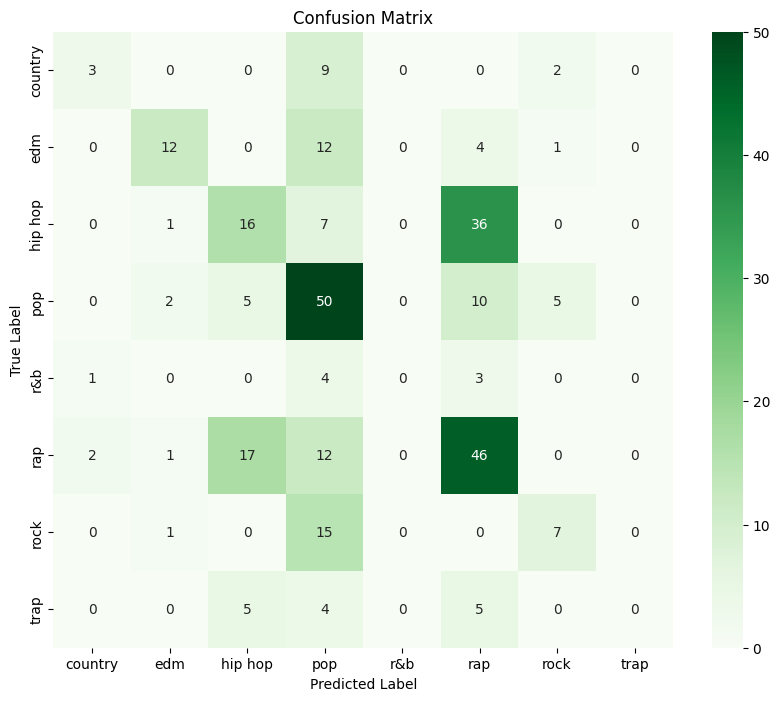

In [ ]:
# Testing Model and getting predictions for CM
predictions = model.predict(X_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_encoded_test_ANN, axis=1)

# Creating a confusion matrix
con_matrix = confusion_matrix(true_labels, predicted_labels)

# Get class names from the mapping
class_names = list(class_mapping.keys())

# Plot the confusion matrix using seaborn with class names
plt.figure(figsize=(10, 8))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### hyperparameter tuning

In [ ]:
# Define hyperparameters to tune
optimizers = ['adam', 'sgd']
units_list = [64, 128, 256]
dropout_rates = [0.2, 0.3, 0.4]

best_accuracy = 0
best_hyperparameters = {}

# Loop through hyperparameter combinations
for optimizer in optimizers:
    for units in units_list:
        for dropout_rate in dropout_rates:
            # Build the model
            model = Sequential()
            model.add(Dense(units=units, activation='relu', input_dim=X_train_scaled.shape[1]))
            model.add(Dropout(dropout_rate))
            model.add(Dense(units=8, activation='softmax'))
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model on the full training set
            model.fit(X_train_scaled, y_encoded_train_ANN, epochs=60, batch_size=32, verbose=0)

            # Evaluate the model on the test set
            _, test_accuracy = model.evaluate(X_test_scaled, y_encoded_test_ANN, verbose=0)

            # Check if this combination is the best so far
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_hyperparameters = {'optimizer': optimizer, 'units': units, 'dropout_rate': dropout_rate}

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", best_hyperparameters)
print("Best Test Accuracy:", best_accuracy)

# Build the final model with the best hyperparameters
final_model = Sequential()
final_model.add(Dense(units=best_hyperparameters['units'], activation='relu', input_dim=X_train_scaled.shape[1]))
final_model.add(Dropout(best_hyperparameters['dropout_rate']))
final_model.add(Dense(units=8, activation='softmax'))
final_model.compile(optimizer=best_hyperparameters['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'])

# Train the final model on the full training set
final_model.fit(X_train_scaled, y_encoded_train_ANN, epochs=60, batch_size=32, verbose=1)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, y_encoded_test_ANN)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print()

Best Hyperparameters: {'optimizer': 'adam', 'units': 64, 'dropout_rate': 0.4}
Best Test Accuracy: 0.46979865431785583
Epoch 1/60
38/38 [==============================] - 1s 3ms/step - loss: 1.9851 - accuracy: 0.2133
Epoch 2/60
38/38 [==============================] - 0s 3ms/step - loss: 1.8905 - accuracy: 0.2712
Epoch 3/60
38/38 [==============================] - 0s 3ms/step - loss: 1.8472 - accuracy: 0.2964
Epoch 4/60
38/38 [==============================] - 0s 3ms/step - loss: 1.8339 - accuracy: 0.2838
Epoch 5/60
38/38 [==============================] - 0s 4ms/step - loss: 1.8033 - accuracy: 0.3006
Epoch 6/60
38/38 [==============================] - 0s 3ms/step - loss: 1.7725 - accuracy: 0.3224
Epoch 7/60
38/38 [==============================] - 0s 3ms/step - loss: 1.7537 - accuracy: 0.3359
Epoch 8/60
38/38 [==============================] - 0s 3ms/step - loss: 1.7295 - accuracy: 0.3518
Epoch 9/60
38/38 [==============================] - 0s 4ms/step - loss: 1.6971 - accuracy: 0.3434


In [ ]:
# Print the architecture of the final_model
print(final_model.summary())

# Print the hyperparameters for each layer
for layer in final_model.layers:
    print(f"Layer: {layer.name}")

    if isinstance(layer, Dense):
        print(f"  - Units: {layer.get_config()['units']}")
        print(f"  - Activation: {layer.get_config()['activation']}")
    elif isinstance(layer, Dropout):
        print(f"  - Dropout Rate: {layer.get_config()['rate']}")

    print("=" * 30)


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                1472      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 8)                 520       
                                                                 
Total params: 1992 (7.78 KB)
Trainable params: 1992 (7.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Layer: dense_42
  - Units: 64
  - Activation: relu
Layer: dropout_21
  - Dropout Rate: 0.4
Layer: dense_43
  - Units: 8
  - Activation: softmax


### Confusion Matrix for comparison


10/10 [==============================] - 0s 2ms/step


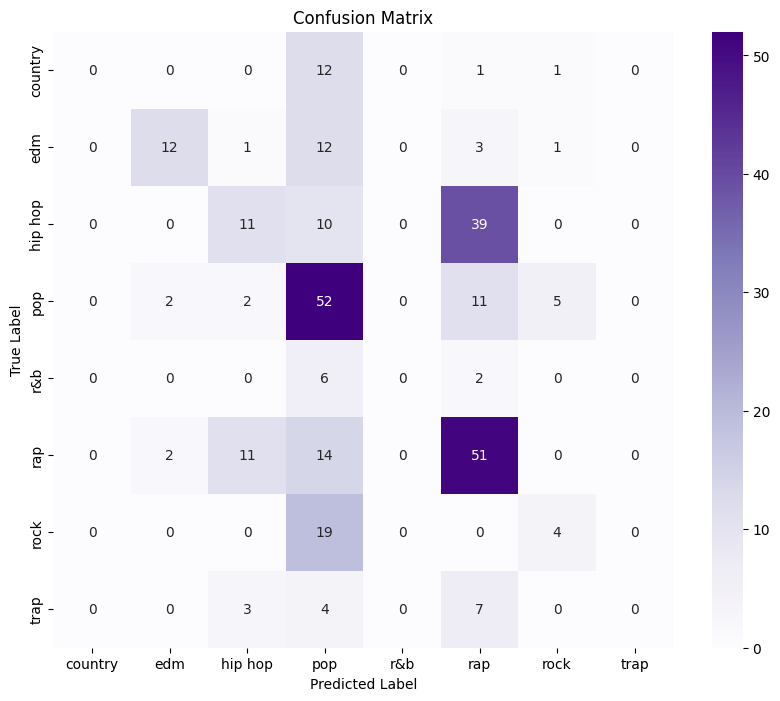

In [ ]:
# Testing Model and getting predictions for CM
predictions = final_model.predict(X_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_encoded_test_ANN, axis=1)

# Creating a confusion matrix
con_matrix = confusion_matrix(true_labels, predicted_labels)

# Get class names from the mapping
class_names = list(class_mapping.keys())

# Plot the confusion matrix using seaborn with class names
plt.figure(figsize=(10, 8))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()